In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data = pd.read_csv('ETH_1H.csv',parse_dates=['Date'],index_col=['Date'])

In [3]:
data.head()

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2020-04-16 00:00:00,1586995200000,ETHUSD,152.94,152.94,150.39,150.39,650.188125
2020-04-15 23:00:00,1586991600000,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2020-04-15 22:00:00,1586988000000,ETHUSD,157.18,157.30,155.32,155.81,106.337279
2020-04-15 21:00:00,1586984400000,ETHUSD,158.04,158.31,157.16,157.18,55.244131
2020-04-15 20:00:00,1586980800000,ETHUSD,157.10,158.10,156.87,158.04,144.262622


In [4]:
data = data.sort_index()

In [5]:
data.head(-5)

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2016-05-09 13:00:00,1462798800,ETHUSD,0.00,12.00,0.00,9.55,432.562115
2016-05-09 14:00:00,1462802400,ETHUSD,9.55,10.00,9.55,10.00,235.774075
2016-05-09 15:00:00,1462806000,ETHUSD,10.00,10.00,9.99,9.99,10.973567
2016-05-09 16:00:00,1462809600,ETHUSD,9.99,9.99,9.79,9.83,62.379450
2016-05-09 17:00:00,1462813200,ETHUSD,9.83,9.83,9.48,9.49,329.553213
...,...,...,...,...,...,...,...
2020-04-15 15:00:00,1586962800000,ETHUSD,157.12,157.15,155.81,155.81,303.839541
2020-04-15 16:00:00,1586966400000,ETHUSD,155.81,157.52,155.74,157.12,430.083035
2020-04-15 17:00:00,1586970000000,ETHUSD,157.12,157.78,156.90,157.48,156.552221


In [6]:
data.shape

(34497, 7)

In [7]:
data.isna().sum()

Unix Timestamp    0
Symbol            0
Open              0
High              0
Low               0
Close             0
Volume            0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data = data.drop(columns=['Unix Timestamp','Symbol'])

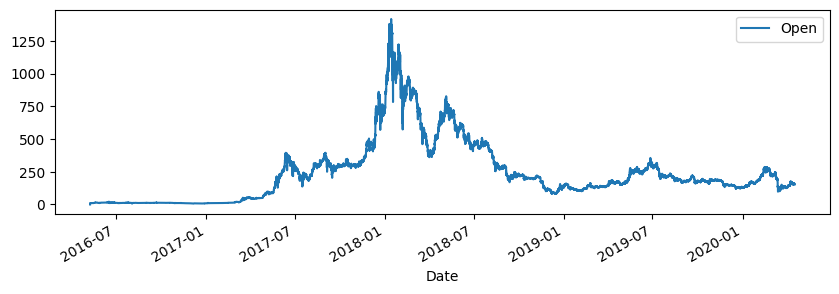

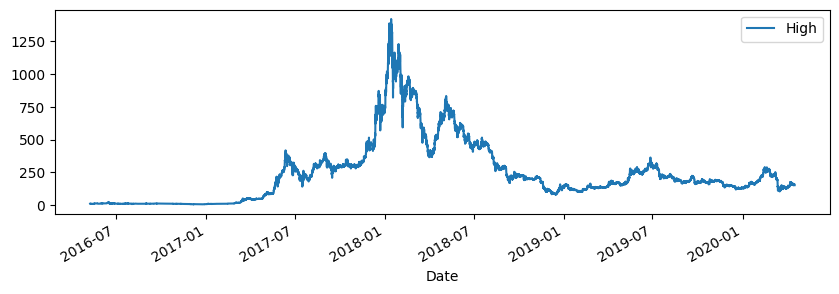

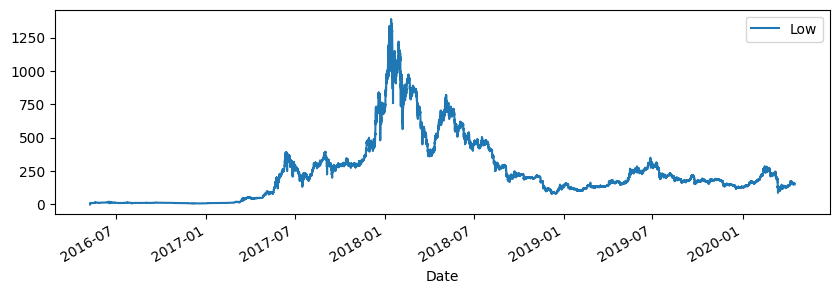

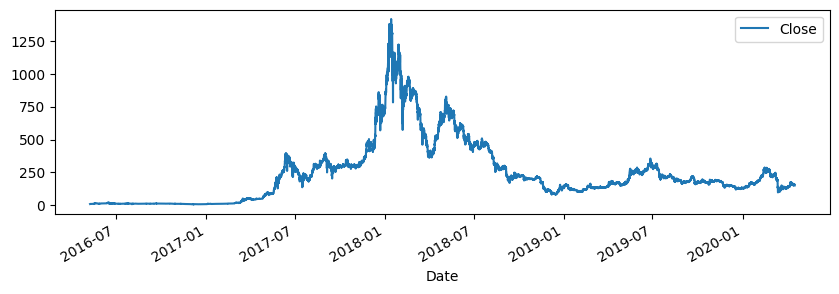

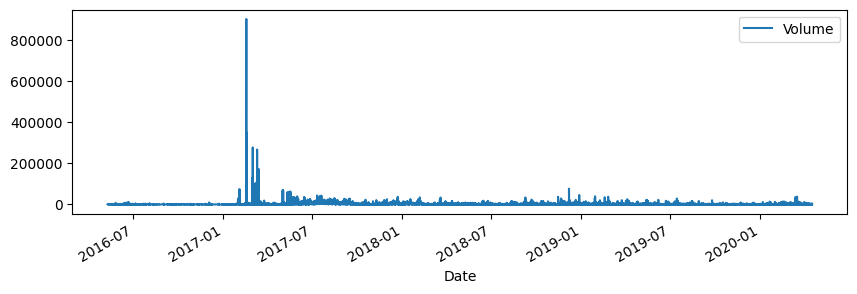

In [10]:
for i in data:
    plt.figure(figsize=(10,3))
    data[i].plot(legend=i)
    plt.show()

In [11]:
#creating the datatime features
def create_f(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['day'] = df.index.day
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofweek'] = df.index.dayofweek
    df['dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.isocalendar().week
    
    return df

In [12]:
df = create_f(data)

In [13]:
df.head()

,Open,High,Low,Close,Volume,hour,day,month,year,dayofweek,dayofyear,weekofyear
Date,,,,,,,,,,,,
2016-05-09 13:00:00,0.00,12.00,0.00,9.55,432.562115,13,9,5,2016,0,130,19
2016-05-09 14:00:00,9.55,10.00,9.55,10.00,235.774075,14,9,5,2016,0,130,19
2016-05-09 15:00:00,10.00,10.00,9.99,9.99,10.973567,15,9,5,2016,0,130,19
2016-05-09 16:00:00,9.99,9.99,9.79,9.83,62.379450,16,9,5,2016,0,130,19
2016-05-09 17:00:00,9.83,9.83,9.48,9.49,329.553213,17,9,5,2016,0,130,19


<AxesSubplot: >

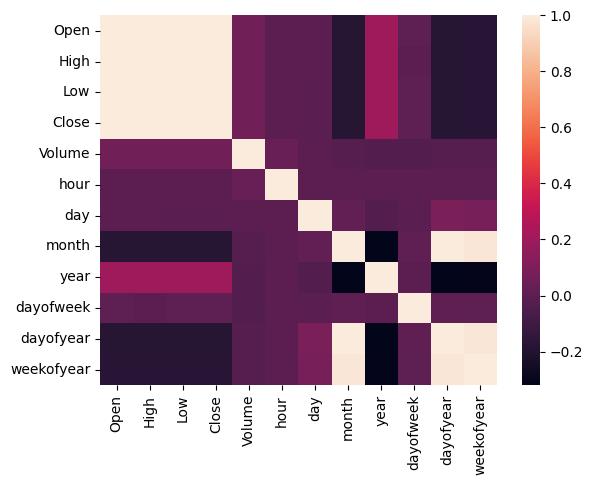

In [14]:
#correlation
sns.heatmap(df.corr())

In [15]:
#generating windows 
# 24 hour window to predict 25th hour using only close

close = df.iloc[:,3]
windows=[]
target=[]
length = 240
for i in (range(len(close)-length)):
    x = close.iloc[i:i+length]
    y = close.iloc[i+length]
    windows.append(x)
    target.append(y)
    
    
windows=np.array(windows)
target=np.array(target).reshape(-1,1)




In [16]:
#creating train and test data

from sklearn.preprocessing import MinMaxScaler



sc = MinMaxScaler()
windows_sc = sc.fit_transform(windows)
target_sc = sc.fit_transform(target)

windows_sc = windows_sc.reshape((len(windows_sc),length,1))

In [17]:
#splitting

# split = int(0.8*len(windows_sc))

# X_train = windows_sc[:split,:,:]
# X_test = windows_sc[split:,:,:]
# y_train = target_sc[:split,:]
# y_test = target_sc[split:,:]

train_split = int(0.7 * len(windows_sc))
val_split = int(0.9 * len(windows_sc))

X_train = windows_sc[:train_split, :, :]
X_val = windows_sc[train_split:val_split, :, :]
X_test = windows_sc[val_split:, :, :]

y_train = target_sc[:train_split, :]
y_val = target_sc[train_split:val_split, :]
y_test = target_sc[val_split:, :]

In [18]:
print(f'Training data shape: X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Validation data shape: X_val: {X_val.shape}, y_val: {y_val.shape}')
print(f'Testing data shape: X_test: {X_test.shape}, y_test: {y_test.shape}')


Training data shape: X_train: (23979, 240, 1), y_train: (23979, 1)
Validation data shape: X_val: (6852, 240, 1), y_val: (6852, 1)
Testing data shape: X_test: (3426, 240, 1), y_test: (3426, 1)


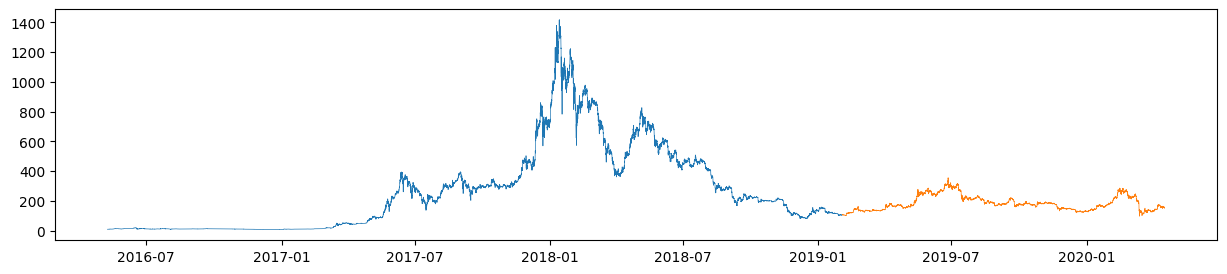

In [19]:
plt.figure(figsize=(15,3))
plt.plot(df['Close'][:train_split],label='Train',linewidth=0.5)
plt.plot(df['Close'][train_split:],label='Test',linewidth=0.5)

# Model building and training

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.regularizers import l1_l2
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score

In [21]:
# Build the model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), 
               kernel_regularizer=l1_l2(l1=0.01, l2=0.01), return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(50, kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 240, 100)          40800     
                                                                 
 batch_normalization (Batch  (None, 240, 100)          400       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 240, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 batch_normalization_1 (Bat  (None, 50)                200       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 50)                0

In [23]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1, 
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
375/375 [==============================] - 361s 952ms/step - loss: 3.6967 - val_loss: 0.4208
Epoch 2/100
375/375 [==============================] - 330s 878ms/step - loss: 0.2395 - val_loss: 0.0829
Epoch 3/100
375/375 [==============================] - 385s 1s/step - loss: 0.0518 - val_loss: 0.0327
Epoch 4/100
375/375 [==============================] - 359s 957ms/step - loss: 0.0280 - val_loss: 0.0234
Epoch 5/100
375/375 [==============================] - 390s 1s/step - loss: 0.0243 - val_loss: 0.0218
Epoch 6/100
375/375 [==============================] - 343s 915ms/step - loss: 0.0240 - val_loss: 0.0276
Epoch 7/100
375/375 [==============================] - 364s 971ms/step - loss: 0.0239 - val_loss: 0.0234
Epoch 8/100
375/375 [==============================] - 367s 978ms/step - loss: 0.0235 - val_loss: 0.0277
Epoch 9/100
375/375 [==============================] - 357s 951ms/step - loss: 0.0236 - val_loss: 0.1634
Epoch 10/100
375/375 [==============================] - 418s 

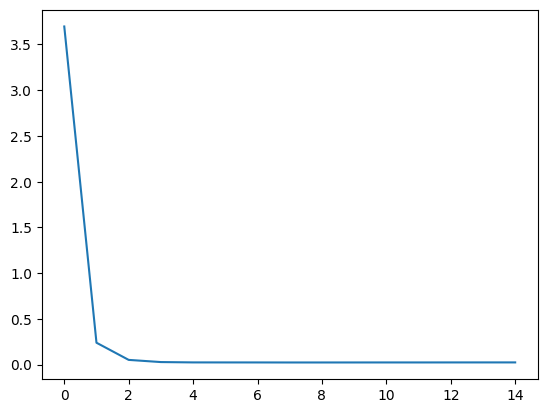

In [24]:
plt.plot(model.history.history['loss'])

In [25]:
# Predict and inverse transform
pred_sc = model.predict(X_test)
pred = sc.inverse_transform(pred_sc)
y_test_ic = sc.inverse_transform(y_test)

108/108 [==============================] - 12s 93ms/step


The Coefficient of determination (R-squared) = 0.964


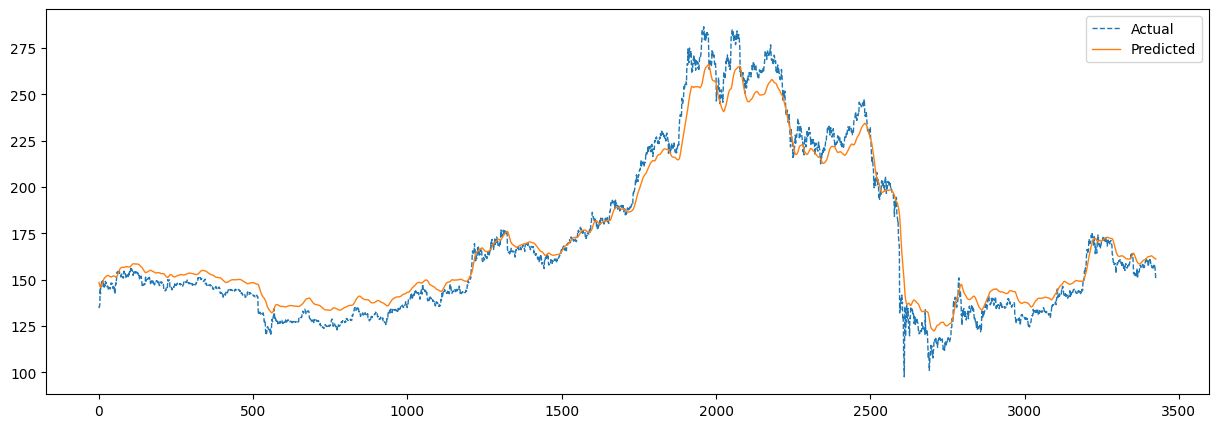

In [26]:
# Evaluate the model
r2 = r2_score(y_test_ic, pred)
print(f'The Coefficient of determination (R-squared) = {r2:.3f}')

# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(y_test_ic, '--', label='Actual', linewidth=1)
plt.plot(pred, label='Predicted', linewidth=1)
plt.legend()
plt.show()


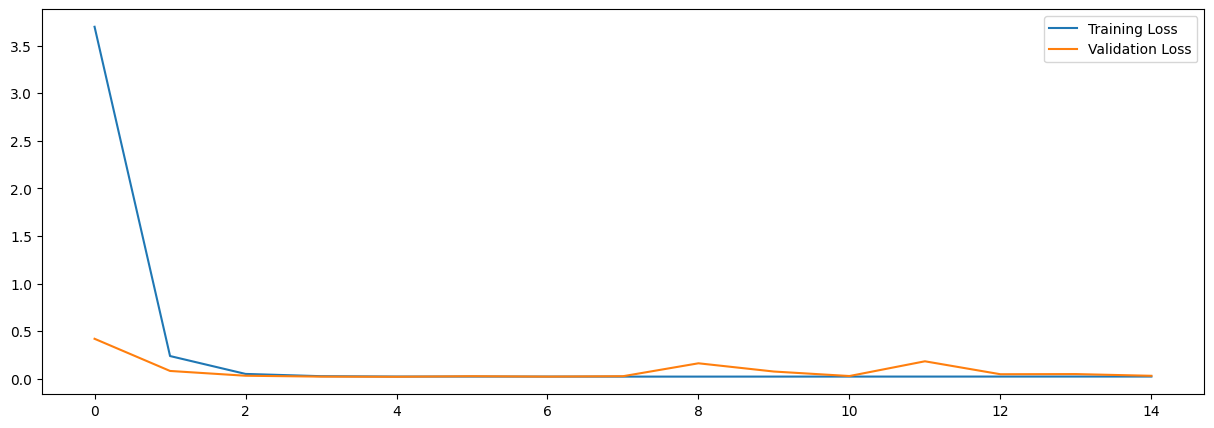

In [27]:
# Plot the training and validation loss
plt.figure(figsize=(15, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Future Prediction

In [28]:
from datetime import datetime
from tqdm import tqdm

str_d1 = '2019/04/16'
str_d2 = '2019/05/16'

# convert string to date object
d1 = datetime.strptime(str_d1, "%Y/%m/%d")
d2 = datetime.strptime(str_d2, "%Y/%m/%d")

delta = d2-d1
steps_in_future = delta.days * 24
print("Steps in future: ",steps_in_future)



Steps in future:  720


In [29]:
#iterative prediction of each future step

f_wind=windows_sc[-1]
f_tar=target_sc[-1]
new=[]

for i in tqdm(range(steps_in_future)):
    curr = np.append(f_wind[1:],[f_tar]).reshape(-1,1)
    #print(curr,end="\n\n")
    next_pred = model.predict(curr.reshape(1,length,1))
    #pred_ic = sc.inverse_transform(next_pred)
    new.append(next_pred[0][0])
    f_wind = curr
    f_tar=next_pred
    

  0%|          | 0/720 [00:00<?, ?it/s]

1/1 [==============================] - 0s 48ms/step


  0%|          | 1/720 [00:00<01:22,  8.74it/s]

1/1 [==============================] - 0s 42ms/step


  0%|          | 2/720 [00:00<01:26,  8.26it/s]

1/1 [==============================] - 0s 42ms/step


  1%|          | 4/720 [00:00<01:08, 10.53it/s]

1/1 [==============================] - 0s 37ms/step


  1%|          | 6/720 [00:00<01:01, 11.67it/s]

1/1 [==============================] - 0s 48ms/step


  1%|          | 8/720 [00:00<01:02, 11.43it/s]

1/1 [==============================] - 0s 50ms/step


  1%|▏         | 10/720 [00:00<01:04, 11.00it/s]

1/1 [==============================] - 0s 49ms/step


  2%|▏         | 12/720 [00:01<01:08, 10.32it/s]

1/1 [==============================] - 0s 52ms/step


  2%|▏         | 14/720 [00:01<01:09, 10.18it/s]

1/1 [==============================] - 0s 51ms/step


  2%|▏         | 16/720 [00:01<01:11,  9.84it/s]

1/1 [==============================] - 0s 58ms/step


  2%|▏         | 17/720 [00:01<01:12,  9.67it/s]

1/1 [==============================] - 0s 60ms/step


  2%|▎         | 18/720 [00:01<01:14,  9.38it/s]

1/1 [==============================] - 0s 60ms/step


  3%|▎         | 19/720 [00:01<01:21,  8.57it/s]

1/1 [==============================] - 0s 57ms/step


  3%|▎         | 20/720 [00:02<01:35,  7.30it/s]

1/1 [==============================] - 0s 60ms/step


  3%|▎         | 21/720 [00:02<01:34,  7.37it/s]

1/1 [==============================] - 0s 60ms/step


  3%|▎         | 22/720 [00:02<01:33,  7.47it/s]

1/1 [==============================] - 0s 68ms/step


  3%|▎         | 23/720 [00:02<01:32,  7.52it/s]

1/1 [==============================] - 0s 68ms/step


  3%|▎         | 24/720 [00:02<01:33,  7.41it/s]

1/1 [==============================] - 0s 69ms/step


  3%|▎         | 25/720 [00:02<01:36,  7.18it/s]

1/1 [==============================] - 0s 72ms/step


  4%|▎         | 26/720 [00:02<01:39,  6.96it/s]

1/1 [==============================] - 0s 63ms/step


  4%|▍         | 27/720 [00:03<01:36,  7.21it/s]

1/1 [==============================] - 0s 68ms/step


  4%|▍         | 28/720 [00:03<01:34,  7.35it/s]

1/1 [==============================] - 0s 69ms/step


  4%|▍         | 29/720 [00:03<01:34,  7.28it/s]

1/1 [==============================] - 0s 80ms/step


  4%|▍         | 30/720 [00:03<01:37,  7.11it/s]

1/1 [==============================] - 0s 71ms/step


  4%|▍         | 31/720 [00:03<01:41,  6.81it/s]

1/1 [==============================] - 0s 73ms/step


  4%|▍         | 32/720 [00:03<01:50,  6.24it/s]

1/1 [==============================] - 0s 61ms/step


  5%|▍         | 33/720 [00:04<01:47,  6.39it/s]

1/1 [==============================] - 0s 81ms/step


  5%|▍         | 34/720 [00:04<01:56,  5.91it/s]

1/1 [==============================] - 0s 72ms/step


  5%|▍         | 35/720 [00:04<01:56,  5.90it/s]

1/1 [==============================] - 0s 76ms/step


  5%|▌         | 36/720 [00:04<01:54,  5.99it/s]

1/1 [==============================] - 0s 75ms/step


  5%|▌         | 37/720 [00:04<01:50,  6.18it/s]

1/1 [==============================] - 0s 73ms/step


  5%|▌         | 38/720 [00:04<01:49,  6.21it/s]

1/1 [==============================] - 0s 71ms/step


  5%|▌         | 39/720 [00:05<01:45,  6.46it/s]

1/1 [==============================] - 0s 66ms/step


  6%|▌         | 40/720 [00:05<01:42,  6.63it/s]

1/1 [==============================] - 0s 61ms/step


  6%|▌         | 41/720 [00:05<01:38,  6.87it/s]

1/1 [==============================] - 0s 89ms/step


  6%|▌         | 42/720 [00:05<01:40,  6.73it/s]

1/1 [==============================] - 0s 83ms/step


  6%|▌         | 43/720 [00:05<01:44,  6.45it/s]

1/1 [==============================] - 0s 65ms/step


  6%|▌         | 44/720 [00:05<01:43,  6.51it/s]

1/1 [==============================] - 0s 62ms/step


  6%|▋         | 45/720 [00:05<01:43,  6.52it/s]

1/1 [==============================] - 0s 64ms/step


  6%|▋         | 46/720 [00:06<01:39,  6.75it/s]

1/1 [==============================] - 0s 76ms/step


  7%|▋         | 47/720 [00:06<01:44,  6.46it/s]

1/1 [==============================] - 0s 86ms/step


  7%|▋         | 48/720 [00:06<01:56,  5.75it/s]

1/1 [==============================] - 0s 58ms/step


  7%|▋         | 49/720 [00:06<01:50,  6.10it/s]

1/1 [==============================] - 0s 64ms/step


  7%|▋         | 50/720 [00:06<01:44,  6.41it/s]

1/1 [==============================] - 0s 79ms/step


  7%|▋         | 51/720 [00:06<01:41,  6.58it/s]

1/1 [==============================] - 0s 69ms/step


  7%|▋         | 52/720 [00:07<01:44,  6.37it/s]

1/1 [==============================] - 0s 70ms/step


  7%|▋         | 53/720 [00:07<01:45,  6.31it/s]

1/1 [==============================] - 0s 67ms/step


  8%|▊         | 54/720 [00:07<01:39,  6.67it/s]

1/1 [==============================] - 0s 68ms/step


  8%|▊         | 55/720 [00:07<01:37,  6.82it/s]

1/1 [==============================] - 0s 66ms/step


  8%|▊         | 56/720 [00:07<01:37,  6.83it/s]

1/1 [==============================] - 0s 73ms/step


  8%|▊         | 57/720 [00:07<01:38,  6.71it/s]

1/1 [==============================] - 0s 73ms/step


  8%|▊         | 58/720 [00:07<01:42,  6.45it/s]

1/1 [==============================] - 0s 63ms/step


  8%|▊         | 59/720 [00:08<01:39,  6.64it/s]

1/1 [==============================] - 0s 59ms/step


  8%|▊         | 60/720 [00:08<01:35,  6.93it/s]

1/1 [==============================] - 0s 54ms/step


  8%|▊         | 61/720 [00:08<01:32,  7.12it/s]

1/1 [==============================] - 0s 81ms/step


  9%|▊         | 62/720 [00:08<01:46,  6.21it/s]

1/1 [==============================] - 0s 75ms/step


  9%|▉         | 63/720 [00:08<01:47,  6.11it/s]

1/1 [==============================] - 0s 65ms/step


  9%|▉         | 64/720 [00:08<01:44,  6.27it/s]

1/1 [==============================] - 0s 63ms/step


  9%|▉         | 65/720 [00:08<01:38,  6.64it/s]

1/1 [==============================] - 0s 61ms/step


  9%|▉         | 66/720 [00:09<01:33,  6.98it/s]

1/1 [==============================] - 0s 69ms/step


  9%|▉         | 67/720 [00:09<01:35,  6.80it/s]

1/1 [==============================] - 0s 68ms/step


  9%|▉         | 68/720 [00:09<01:37,  6.66it/s]

1/1 [==============================] - 0s 63ms/step


 10%|▉         | 69/720 [00:09<01:38,  6.62it/s]

1/1 [==============================] - 0s 61ms/step


 10%|▉         | 70/720 [00:09<01:33,  6.93it/s]

1/1 [==============================] - 0s 85ms/step


 10%|▉         | 71/720 [00:09<01:34,  6.86it/s]

1/1 [==============================] - 0s 88ms/step


 10%|█         | 72/720 [00:10<01:45,  6.17it/s]

1/1 [==============================] - 0s 91ms/step


 10%|█         | 73/720 [00:10<01:46,  6.09it/s]

1/1 [==============================] - 0s 87ms/step


 10%|█         | 74/720 [00:10<01:44,  6.18it/s]

1/1 [==============================] - 0s 89ms/step


 10%|█         | 75/720 [00:10<01:53,  5.66it/s]

1/1 [==============================] - 0s 87ms/step


 11%|█         | 76/720 [00:10<01:58,  5.45it/s]

1/1 [==============================] - 0s 67ms/step


 11%|█         | 77/720 [00:10<01:54,  5.62it/s]

1/1 [==============================] - 0s 83ms/step


 11%|█         | 78/720 [00:11<01:53,  5.65it/s]

1/1 [==============================] - 0s 69ms/step


 11%|█         | 79/720 [00:11<01:49,  5.83it/s]

1/1 [==============================] - 0s 69ms/step


 11%|█         | 80/720 [00:11<01:44,  6.11it/s]

1/1 [==============================] - 0s 60ms/step


 11%|█▏        | 81/720 [00:11<01:38,  6.51it/s]

1/1 [==============================] - 0s 58ms/step


 11%|█▏        | 82/720 [00:11<01:33,  6.82it/s]

1/1 [==============================] - 0s 134ms/step


 12%|█▏        | 83/720 [00:11<01:47,  5.92it/s]

1/1 [==============================] - 0s 95ms/step


 12%|█▏        | 84/720 [00:12<01:55,  5.51it/s]

1/1 [==============================] - 0s 61ms/step


 12%|█▏        | 85/720 [00:12<01:48,  5.83it/s]

1/1 [==============================] - 0s 85ms/step


 12%|█▏        | 86/720 [00:12<01:50,  5.74it/s]

1/1 [==============================] - 0s 119ms/step


 12%|█▏        | 87/720 [00:12<02:15,  4.68it/s]

1/1 [==============================] - 0s 102ms/step


 12%|█▏        | 88/720 [00:12<02:15,  4.68it/s]

1/1 [==============================] - 0s 90ms/step


 12%|█▏        | 89/720 [00:13<02:13,  4.74it/s]

1/1 [==============================] - 0s 72ms/step


 12%|█▎        | 90/720 [00:13<02:06,  4.99it/s]

1/1 [==============================] - 0s 81ms/step


 13%|█▎        | 91/720 [00:13<02:00,  5.23it/s]

1/1 [==============================] - 0s 87ms/step


 13%|█▎        | 92/720 [00:13<01:57,  5.32it/s]

1/1 [==============================] - 0s 65ms/step


 13%|█▎        | 93/720 [00:13<01:51,  5.63it/s]

1/1 [==============================] - 0s 64ms/step


 13%|█▎        | 94/720 [00:13<01:41,  6.18it/s]

1/1 [==============================] - 0s 59ms/step


 13%|█▎        | 95/720 [00:14<01:35,  6.54it/s]

1/1 [==============================] - 0s 71ms/step


 13%|█▎        | 96/720 [00:14<01:40,  6.22it/s]

1/1 [==============================] - 0s 130ms/step


 13%|█▎        | 97/720 [00:14<01:59,  5.23it/s]

1/1 [==============================] - 0s 62ms/step


 14%|█▎        | 98/720 [00:14<01:49,  5.69it/s]

1/1 [==============================] - 0s 63ms/step


 14%|█▍        | 99/720 [00:14<01:40,  6.15it/s]

1/1 [==============================] - 0s 82ms/step


 14%|█▍        | 100/720 [00:14<01:43,  6.01it/s]

1/1 [==============================] - 0s 95ms/step


 14%|█▍        | 101/720 [00:18<12:55,  1.25s/it]

1/1 [==============================] - 0s 87ms/step


 14%|█▍        | 102/720 [00:18<09:37,  1.07it/s]

1/1 [==============================] - 0s 78ms/step


 14%|█▍        | 103/720 [00:19<07:13,  1.42it/s]

1/1 [==============================] - 0s 93ms/step


 14%|█▍        | 104/720 [00:19<05:36,  1.83it/s]

1/1 [==============================] - 0s 98ms/step


 15%|█▍        | 105/720 [00:19<04:31,  2.26it/s]

1/1 [==============================] - 0s 87ms/step


 15%|█▍        | 106/720 [00:19<03:43,  2.75it/s]

1/1 [==============================] - 0s 93ms/step


 15%|█▍        | 107/720 [00:19<03:12,  3.19it/s]

1/1 [==============================] - 0s 89ms/step


 15%|█▌        | 108/720 [00:20<02:49,  3.62it/s]

1/1 [==============================] - 0s 69ms/step


 15%|█▌        | 109/720 [00:20<02:31,  4.04it/s]

1/1 [==============================] - 0s 70ms/step


 15%|█▌        | 110/720 [00:20<02:17,  4.43it/s]

1/1 [==============================] - 0s 79ms/step


 15%|█▌        | 111/720 [00:20<02:12,  4.60it/s]

1/1 [==============================] - 0s 156ms/step


 16%|█▌        | 112/720 [00:20<02:21,  4.30it/s]

1/1 [==============================] - 0s 95ms/step


 16%|█▌        | 113/720 [00:21<02:14,  4.52it/s]

1/1 [==============================] - 0s 70ms/step


 16%|█▌        | 114/720 [00:21<02:05,  4.82it/s]

1/1 [==============================] - 0s 99ms/step


 16%|█▌        | 115/720 [00:21<02:01,  4.98it/s]

1/1 [==============================] - 0s 102ms/step


 16%|█▌        | 116/720 [00:21<02:02,  4.94it/s]

1/1 [==============================] - 0s 79ms/step


 16%|█▋        | 117/720 [00:21<01:58,  5.08it/s]

1/1 [==============================] - 0s 72ms/step


 16%|█▋        | 118/720 [00:22<01:50,  5.46it/s]

1/1 [==============================] - 0s 78ms/step


 17%|█▋        | 119/720 [00:22<01:44,  5.74it/s]

1/1 [==============================] - 0s 92ms/step


 17%|█▋        | 120/720 [00:22<01:49,  5.49it/s]

1/1 [==============================] - 0s 72ms/step


 17%|█▋        | 121/720 [00:22<01:49,  5.45it/s]

1/1 [==============================] - 0s 114ms/step


 17%|█▋        | 122/720 [00:22<02:11,  4.56it/s]

1/1 [==============================] - 0s 82ms/step


 17%|█▋        | 123/720 [00:23<02:05,  4.75it/s]

1/1 [==============================] - 0s 104ms/step


 17%|█▋        | 124/720 [00:23<02:05,  4.75it/s]

1/1 [==============================] - 0s 84ms/step


 17%|█▋        | 125/720 [00:23<02:01,  4.88it/s]

1/1 [==============================] - 0s 79ms/step


 18%|█▊        | 126/720 [00:23<02:05,  4.73it/s]

1/1 [==============================] - 0s 100ms/step


 18%|█▊        | 127/720 [00:23<02:09,  4.59it/s]

1/1 [==============================] - 0s 89ms/step


 18%|█▊        | 128/720 [00:24<02:08,  4.62it/s]

1/1 [==============================] - 0s 85ms/step


 18%|█▊        | 129/720 [00:24<02:12,  4.44it/s]

1/1 [==============================] - 0s 88ms/step


 18%|█▊        | 130/720 [00:24<02:10,  4.53it/s]

1/1 [==============================] - 0s 85ms/step


 18%|█▊        | 131/720 [00:24<02:10,  4.50it/s]

1/1 [==============================] - 0s 70ms/step


 18%|█▊        | 132/720 [00:24<02:02,  4.81it/s]

1/1 [==============================] - 0s 69ms/step


 18%|█▊        | 133/720 [00:25<02:02,  4.80it/s]

1/1 [==============================] - 0s 112ms/step


 19%|█▊        | 134/720 [00:25<01:58,  4.93it/s]

1/1 [==============================] - 0s 109ms/step


 19%|█▉        | 135/720 [00:25<02:22,  4.10it/s]

1/1 [==============================] - 0s 75ms/step


 19%|█▉        | 136/720 [00:25<02:12,  4.42it/s]

1/1 [==============================] - 0s 96ms/step


 19%|█▉        | 137/720 [00:26<02:10,  4.46it/s]

1/1 [==============================] - 0s 84ms/step


 19%|█▉        | 138/720 [00:26<02:07,  4.57it/s]

1/1 [==============================] - 0s 97ms/step


 19%|█▉        | 139/720 [00:26<02:05,  4.61it/s]

1/1 [==============================] - 0s 101ms/step


 19%|█▉        | 140/720 [00:26<02:11,  4.43it/s]

1/1 [==============================] - 0s 89ms/step


 20%|█▉        | 141/720 [00:27<02:14,  4.32it/s]

1/1 [==============================] - 0s 104ms/step


 20%|█▉        | 142/720 [00:27<02:09,  4.46it/s]

1/1 [==============================] - 0s 115ms/step


 20%|█▉        | 143/720 [00:27<02:20,  4.10it/s]

1/1 [==============================] - 0s 114ms/step


 20%|██        | 144/720 [00:27<02:43,  3.53it/s]

1/1 [==============================] - 0s 107ms/step


 20%|██        | 145/720 [00:28<02:38,  3.62it/s]

1/1 [==============================] - 0s 129ms/step


 20%|██        | 146/720 [00:28<02:46,  3.45it/s]

1/1 [==============================] - 0s 113ms/step


 20%|██        | 147/720 [00:28<03:03,  3.13it/s]

1/1 [==============================] - 0s 177ms/step


 21%|██        | 148/720 [00:29<03:05,  3.08it/s]

1/1 [==============================] - 0s 135ms/step


 21%|██        | 149/720 [00:29<03:17,  2.89it/s]

1/1 [==============================] - 0s 194ms/step


 21%|██        | 150/720 [00:30<03:31,  2.70it/s]

1/1 [==============================] - 0s 165ms/step


 21%|██        | 151/720 [00:30<03:41,  2.57it/s]

1/1 [==============================] - 0s 125ms/step


 21%|██        | 152/720 [00:30<03:38,  2.60it/s]

1/1 [==============================] - 0s 95ms/step


 21%|██▏       | 153/720 [00:31<03:14,  2.91it/s]

1/1 [==============================] - 0s 94ms/step


 21%|██▏       | 154/720 [00:31<02:53,  3.26it/s]

1/1 [==============================] - 0s 110ms/step


 22%|██▏       | 155/720 [00:31<02:39,  3.55it/s]

1/1 [==============================] - 0s 99ms/step


 22%|██▏       | 156/720 [00:31<02:46,  3.39it/s]

1/1 [==============================] - 0s 93ms/step


 22%|██▏       | 157/720 [00:32<02:30,  3.74it/s]

1/1 [==============================] - 0s 81ms/step


 22%|██▏       | 158/720 [00:32<02:31,  3.70it/s]

1/1 [==============================] - 0s 86ms/step


 22%|██▏       | 159/720 [00:32<02:16,  4.12it/s]

1/1 [==============================] - 0s 92ms/step


 22%|██▏       | 160/720 [00:32<02:08,  4.36it/s]

1/1 [==============================] - 0s 100ms/step


 22%|██▏       | 161/720 [00:32<02:03,  4.52it/s]

1/1 [==============================] - 0s 85ms/step


 22%|██▎       | 162/720 [00:33<01:58,  4.69it/s]

1/1 [==============================] - 0s 142ms/step


 23%|██▎       | 163/720 [00:33<02:17,  4.05it/s]

1/1 [==============================] - 0s 97ms/step


 23%|██▎       | 164/720 [00:33<02:11,  4.24it/s]

1/1 [==============================] - 0s 91ms/step


 23%|██▎       | 165/720 [00:33<02:06,  4.39it/s]

1/1 [==============================] - 0s 86ms/step


 23%|██▎       | 166/720 [00:34<02:01,  4.58it/s]

1/1 [==============================] - 0s 88ms/step


 23%|██▎       | 167/720 [00:34<02:03,  4.48it/s]

1/1 [==============================] - 0s 100ms/step


 23%|██▎       | 168/720 [00:34<02:10,  4.23it/s]

1/1 [==============================] - 0s 93ms/step


 23%|██▎       | 169/720 [00:34<02:10,  4.23it/s]

1/1 [==============================] - 0s 103ms/step


 24%|██▎       | 170/720 [00:35<02:23,  3.84it/s]

1/1 [==============================] - 0s 90ms/step


 24%|██▍       | 171/720 [00:35<02:13,  4.10it/s]

1/1 [==============================] - 0s 87ms/step


 24%|██▍       | 172/720 [00:35<02:05,  4.37it/s]

1/1 [==============================] - 0s 84ms/step


 24%|██▍       | 173/720 [00:35<02:02,  4.47it/s]

1/1 [==============================] - 0s 85ms/step


 24%|██▍       | 174/720 [00:35<01:56,  4.68it/s]

1/1 [==============================] - 0s 86ms/step


 24%|██▍       | 175/720 [00:36<01:58,  4.59it/s]

1/1 [==============================] - 0s 87ms/step


 24%|██▍       | 176/720 [00:36<01:55,  4.72it/s]

1/1 [==============================] - 0s 90ms/step


 25%|██▍       | 177/720 [00:36<01:56,  4.67it/s]

1/1 [==============================] - 0s 86ms/step


 25%|██▍       | 178/720 [00:36<01:52,  4.83it/s]

1/1 [==============================] - 0s 89ms/step


 25%|██▍       | 179/720 [00:37<02:04,  4.36it/s]

1/1 [==============================] - 0s 128ms/step


 25%|██▌       | 180/720 [00:37<02:05,  4.31it/s]

1/1 [==============================] - 0s 141ms/step


 25%|██▌       | 181/720 [00:37<02:09,  4.16it/s]

1/1 [==============================] - 0s 84ms/step


 25%|██▌       | 182/720 [00:37<02:00,  4.48it/s]

1/1 [==============================] - 0s 90ms/step


 25%|██▌       | 183/720 [00:37<01:56,  4.62it/s]

1/1 [==============================] - 0s 86ms/step


 26%|██▌       | 184/720 [00:38<01:49,  4.92it/s]

1/1 [==============================] - 0s 99ms/step


 26%|██▌       | 185/720 [00:38<01:50,  4.86it/s]

1/1 [==============================] - 0s 79ms/step


 26%|██▌       | 186/720 [00:38<01:46,  5.00it/s]

1/1 [==============================] - 0s 92ms/step


 26%|██▌       | 187/720 [00:38<01:48,  4.91it/s]

1/1 [==============================] - 0s 97ms/step


 26%|██▌       | 188/720 [00:38<01:59,  4.47it/s]

1/1 [==============================] - 0s 86ms/step


 26%|██▋       | 189/720 [00:39<01:56,  4.57it/s]

1/1 [==============================] - 0s 93ms/step


 26%|██▋       | 190/720 [00:39<01:54,  4.64it/s]

1/1 [==============================] - 0s 96ms/step


 27%|██▋       | 191/720 [00:39<01:54,  4.61it/s]

1/1 [==============================] - 0s 88ms/step


 27%|██▋       | 192/720 [00:39<01:55,  4.58it/s]

1/1 [==============================] - 0s 80ms/step


 27%|██▋       | 193/720 [00:39<01:50,  4.77it/s]

1/1 [==============================] - 0s 87ms/step


 27%|██▋       | 194/720 [00:40<01:59,  4.40it/s]

1/1 [==============================] - 0s 92ms/step


 27%|██▋       | 195/720 [00:40<01:52,  4.65it/s]

1/1 [==============================] - 0s 86ms/step


 27%|██▋       | 196/720 [00:40<01:47,  4.86it/s]

1/1 [==============================] - 0s 89ms/step


 27%|██▋       | 197/720 [00:40<01:45,  4.96it/s]

1/1 [==============================] - 0s 91ms/step


 28%|██▊       | 198/720 [00:41<01:41,  5.15it/s]

1/1 [==============================] - 0s 88ms/step


 28%|██▊       | 199/720 [00:41<01:38,  5.27it/s]

1/1 [==============================] - 0s 78ms/step


 28%|██▊       | 200/720 [00:41<01:37,  5.34it/s]

1/1 [==============================] - 0s 84ms/step


 28%|██▊       | 201/720 [00:41<01:36,  5.38it/s]

1/1 [==============================] - 0s 88ms/step


 28%|██▊       | 202/720 [00:41<01:35,  5.42it/s]

1/1 [==============================] - 0s 85ms/step


 28%|██▊       | 203/720 [00:41<01:34,  5.49it/s]

1/1 [==============================] - 0s 81ms/step


 28%|██▊       | 204/720 [00:42<01:35,  5.42it/s]

1/1 [==============================] - 0s 85ms/step


 28%|██▊       | 205/720 [00:42<01:33,  5.51it/s]

1/1 [==============================] - 0s 111ms/step


 29%|██▊       | 206/720 [00:42<01:39,  5.14it/s]

1/1 [==============================] - 0s 86ms/step


 29%|██▉       | 207/720 [00:42<01:35,  5.39it/s]

1/1 [==============================] - 0s 88ms/step


 29%|██▉       | 208/720 [00:42<01:33,  5.46it/s]

1/1 [==============================] - 0s 80ms/step


 29%|██▉       | 209/720 [00:42<01:29,  5.69it/s]

1/1 [==============================] - 0s 81ms/step


 29%|██▉       | 210/720 [00:43<01:29,  5.71it/s]

1/1 [==============================] - 0s 80ms/step


 29%|██▉       | 211/720 [00:43<01:29,  5.71it/s]

1/1 [==============================] - 0s 86ms/step


 29%|██▉       | 212/720 [00:43<01:29,  5.65it/s]

1/1 [==============================] - 0s 80ms/step


 30%|██▉       | 213/720 [00:43<01:28,  5.72it/s]

1/1 [==============================] - 0s 88ms/step


 30%|██▉       | 214/720 [00:43<01:30,  5.56it/s]

1/1 [==============================] - 0s 90ms/step


 30%|██▉       | 215/720 [00:44<01:30,  5.58it/s]

1/1 [==============================] - 0s 88ms/step


 30%|███       | 216/720 [00:44<01:31,  5.53it/s]

1/1 [==============================] - 0s 129ms/step


 30%|███       | 217/720 [00:44<01:35,  5.27it/s]

1/1 [==============================] - 0s 83ms/step


 30%|███       | 218/720 [00:44<01:33,  5.39it/s]

1/1 [==============================] - 0s 77ms/step


 30%|███       | 219/720 [00:44<01:30,  5.56it/s]

1/1 [==============================] - 0s 91ms/step


 31%|███       | 220/720 [00:44<01:30,  5.51it/s]

1/1 [==============================] - 0s 73ms/step


 31%|███       | 221/720 [00:45<01:31,  5.46it/s]

1/1 [==============================] - 0s 88ms/step


 31%|███       | 222/720 [00:45<01:29,  5.57it/s]

1/1 [==============================] - 0s 83ms/step


 31%|███       | 223/720 [00:45<01:30,  5.51it/s]

1/1 [==============================] - 0s 87ms/step


 31%|███       | 224/720 [00:45<01:28,  5.58it/s]

1/1 [==============================] - 0s 99ms/step


 31%|███▏      | 225/720 [00:45<01:30,  5.44it/s]

1/1 [==============================] - 0s 83ms/step


 31%|███▏      | 226/720 [00:46<01:31,  5.42it/s]

1/1 [==============================] - 0s 82ms/step


 32%|███▏      | 227/720 [00:46<01:31,  5.38it/s]

1/1 [==============================] - 0s 88ms/step


 32%|███▏      | 228/720 [00:46<01:41,  4.83it/s]

1/1 [==============================] - 0s 77ms/step


 32%|███▏      | 229/720 [00:46<01:38,  5.01it/s]

1/1 [==============================] - 0s 92ms/step


 32%|███▏      | 230/720 [00:46<01:34,  5.17it/s]

1/1 [==============================] - 0s 89ms/step


 32%|███▏      | 231/720 [00:47<01:33,  5.24it/s]

1/1 [==============================] - 0s 81ms/step


 32%|███▏      | 232/720 [00:47<01:31,  5.33it/s]

1/1 [==============================] - 0s 84ms/step


 32%|███▏      | 233/720 [00:47<01:28,  5.49it/s]

1/1 [==============================] - 0s 98ms/step


 32%|███▎      | 234/720 [00:47<01:28,  5.50it/s]

1/1 [==============================] - 0s 89ms/step


 33%|███▎      | 235/720 [00:47<01:27,  5.53it/s]

1/1 [==============================] - 0s 85ms/step


 33%|███▎      | 236/720 [00:47<01:26,  5.61it/s]

1/1 [==============================] - 0s 80ms/step


 33%|███▎      | 237/720 [00:48<01:25,  5.63it/s]

1/1 [==============================] - 0s 85ms/step


 33%|███▎      | 238/720 [00:48<01:26,  5.54it/s]

1/1 [==============================] - 0s 87ms/step


 33%|███▎      | 239/720 [00:48<01:27,  5.48it/s]

1/1 [==============================] - 0s 81ms/step


 33%|███▎      | 240/720 [00:48<01:35,  5.02it/s]

1/1 [==============================] - 0s 81ms/step


 33%|███▎      | 241/720 [00:48<01:29,  5.33it/s]

1/1 [==============================] - 0s 90ms/step


 34%|███▎      | 242/720 [00:49<01:27,  5.47it/s]

1/1 [==============================] - 0s 80ms/step


 34%|███▍      | 243/720 [00:49<01:26,  5.51it/s]

1/1 [==============================] - 0s 75ms/step


 34%|███▍      | 244/720 [00:49<01:24,  5.63it/s]

1/1 [==============================] - 0s 98ms/step


 34%|███▍      | 245/720 [00:49<01:26,  5.51it/s]

1/1 [==============================] - 0s 98ms/step


 34%|███▍      | 246/720 [00:49<01:27,  5.39it/s]

1/1 [==============================] - 0s 80ms/step


 34%|███▍      | 247/720 [00:49<01:23,  5.67it/s]

1/1 [==============================] - 0s 82ms/step


 34%|███▍      | 248/720 [00:50<01:23,  5.65it/s]

1/1 [==============================] - 0s 89ms/step


 35%|███▍      | 249/720 [00:50<01:25,  5.52it/s]

1/1 [==============================] - 0s 85ms/step


 35%|███▍      | 250/720 [00:50<01:23,  5.62it/s]

1/1 [==============================] - 0s 93ms/step


 35%|███▍      | 251/720 [00:50<01:29,  5.25it/s]

1/1 [==============================] - 0s 87ms/step


 35%|███▌      | 252/720 [00:50<01:27,  5.33it/s]

1/1 [==============================] - 0s 82ms/step


 35%|███▌      | 253/720 [00:51<01:26,  5.42it/s]

1/1 [==============================] - 0s 96ms/step


 35%|███▌      | 254/720 [00:51<01:26,  5.37it/s]

1/1 [==============================] - 0s 90ms/step


 35%|███▌      | 255/720 [00:51<01:25,  5.46it/s]

1/1 [==============================] - 0s 88ms/step


 36%|███▌      | 256/720 [00:51<01:24,  5.50it/s]

1/1 [==============================] - 0s 87ms/step


 36%|███▌      | 257/720 [00:51<01:23,  5.56it/s]

1/1 [==============================] - 0s 86ms/step


 36%|███▌      | 258/720 [00:51<01:22,  5.62it/s]

1/1 [==============================] - 0s 71ms/step


 36%|███▌      | 259/720 [00:52<01:19,  5.81it/s]

1/1 [==============================] - 0s 76ms/step


 36%|███▌      | 260/720 [00:52<01:17,  5.92it/s]

1/1 [==============================] - 0s 77ms/step


 36%|███▋      | 261/720 [00:52<01:18,  5.85it/s]

1/1 [==============================] - 0s 83ms/step


 36%|███▋      | 262/720 [00:52<01:17,  5.94it/s]

1/1 [==============================] - 0s 77ms/step


 37%|███▋      | 263/720 [00:52<01:21,  5.61it/s]

1/1 [==============================] - 0s 89ms/step


 37%|███▋      | 264/720 [00:53<01:21,  5.62it/s]

1/1 [==============================] - 0s 96ms/step


 37%|███▋      | 265/720 [00:53<01:20,  5.68it/s]

1/1 [==============================] - 0s 88ms/step


 37%|███▋      | 266/720 [00:53<01:19,  5.73it/s]

1/1 [==============================] - 0s 87ms/step


 37%|███▋      | 267/720 [00:53<01:18,  5.76it/s]

1/1 [==============================] - 0s 65ms/step


 37%|███▋      | 268/720 [00:53<01:14,  6.03it/s]

1/1 [==============================] - 0s 70ms/step


 37%|███▋      | 269/720 [00:53<01:11,  6.27it/s]

1/1 [==============================] - 0s 81ms/step


 38%|███▊      | 270/720 [00:53<01:10,  6.35it/s]

1/1 [==============================] - 0s 74ms/step


 38%|███▊      | 271/720 [00:54<01:08,  6.56it/s]

1/1 [==============================] - 0s 71ms/step


 38%|███▊      | 272/720 [00:54<01:09,  6.46it/s]

1/1 [==============================] - 0s 72ms/step


 38%|███▊      | 273/720 [00:54<01:08,  6.57it/s]

1/1 [==============================] - 0s 80ms/step


 38%|███▊      | 274/720 [00:54<01:07,  6.56it/s]

1/1 [==============================] - 0s 79ms/step


 38%|███▊      | 275/720 [00:54<01:14,  6.01it/s]

1/1 [==============================] - 0s 81ms/step


 38%|███▊      | 276/720 [00:54<01:11,  6.17it/s]

1/1 [==============================] - 0s 78ms/step


 38%|███▊      | 277/720 [00:55<01:12,  6.13it/s]

1/1 [==============================] - 0s 85ms/step


 39%|███▊      | 278/720 [00:55<01:13,  6.01it/s]

1/1 [==============================] - 0s 89ms/step


 39%|███▉      | 279/720 [00:55<01:17,  5.70it/s]

1/1 [==============================] - 0s 81ms/step


 39%|███▉      | 280/720 [00:55<01:15,  5.80it/s]

1/1 [==============================] - 0s 75ms/step


 39%|███▉      | 281/720 [00:55<01:13,  5.94it/s]

1/1 [==============================] - 0s 82ms/step


 39%|███▉      | 282/720 [00:55<01:12,  6.03it/s]

1/1 [==============================] - 0s 77ms/step


 39%|███▉      | 283/720 [00:56<01:10,  6.16it/s]

1/1 [==============================] - 0s 80ms/step


 39%|███▉      | 284/720 [00:56<01:10,  6.18it/s]

1/1 [==============================] - 0s 81ms/step


 40%|███▉      | 285/720 [00:56<01:12,  6.00it/s]

1/1 [==============================] - 0s 81ms/step


 40%|███▉      | 286/720 [00:56<01:10,  6.12it/s]

1/1 [==============================] - 0s 86ms/step


 40%|███▉      | 287/720 [00:56<01:18,  5.49it/s]

1/1 [==============================] - 0s 89ms/step


 40%|████      | 288/720 [00:57<01:19,  5.42it/s]

1/1 [==============================] - 0s 102ms/step


 40%|████      | 289/720 [00:57<01:24,  5.13it/s]

1/1 [==============================] - 0s 92ms/step


 40%|████      | 290/720 [00:57<01:25,  5.01it/s]

1/1 [==============================] - 0s 72ms/step


 40%|████      | 291/720 [00:57<01:21,  5.28it/s]

1/1 [==============================] - 0s 88ms/step


 41%|████      | 292/720 [00:57<01:18,  5.45it/s]

1/1 [==============================] - 0s 82ms/step


 41%|████      | 293/720 [00:57<01:18,  5.46it/s]

1/1 [==============================] - 0s 81ms/step


 41%|████      | 294/720 [00:58<01:17,  5.49it/s]

1/1 [==============================] - 0s 91ms/step


 41%|████      | 295/720 [00:58<01:17,  5.51it/s]

1/1 [==============================] - 0s 90ms/step


 41%|████      | 296/720 [00:58<01:16,  5.55it/s]

1/1 [==============================] - 0s 87ms/step


 41%|████▏     | 297/720 [00:58<01:15,  5.61it/s]

1/1 [==============================] - 0s 74ms/step


 41%|████▏     | 298/720 [00:58<01:20,  5.26it/s]

1/1 [==============================] - 0s 87ms/step


 42%|████▏     | 299/720 [00:59<01:21,  5.16it/s]

1/1 [==============================] - 0s 85ms/step


 42%|████▏     | 300/720 [00:59<01:17,  5.42it/s]

1/1 [==============================] - 0s 90ms/step


 42%|████▏     | 301/720 [00:59<01:17,  5.40it/s]

1/1 [==============================] - 0s 83ms/step


 42%|████▏     | 302/720 [00:59<01:15,  5.54it/s]

1/1 [==============================] - 0s 83ms/step


 42%|████▏     | 303/720 [00:59<01:14,  5.56it/s]

1/1 [==============================] - 0s 78ms/step


 42%|████▏     | 304/720 [00:59<01:12,  5.73it/s]

1/1 [==============================] - 0s 92ms/step


 42%|████▏     | 305/720 [01:00<01:13,  5.65it/s]

1/1 [==============================] - 0s 83ms/step


 42%|████▎     | 306/720 [01:00<01:15,  5.47it/s]

1/1 [==============================] - 0s 81ms/step


 43%|████▎     | 307/720 [01:00<01:13,  5.60it/s]

1/1 [==============================] - 0s 82ms/step


 43%|████▎     | 308/720 [01:00<01:12,  5.68it/s]

1/1 [==============================] - 0s 91ms/step


 43%|████▎     | 309/720 [01:00<01:25,  4.81it/s]

1/1 [==============================] - 0s 92ms/step


 43%|████▎     | 310/720 [01:01<01:21,  5.02it/s]

1/1 [==============================] - 0s 89ms/step


 43%|████▎     | 311/720 [01:01<01:21,  5.01it/s]

1/1 [==============================] - 0s 85ms/step


 43%|████▎     | 312/720 [01:01<01:17,  5.26it/s]

1/1 [==============================] - 0s 84ms/step


 43%|████▎     | 313/720 [01:01<01:14,  5.47it/s]

1/1 [==============================] - 0s 87ms/step


 44%|████▎     | 314/720 [01:01<01:12,  5.62it/s]

1/1 [==============================] - 0s 90ms/step


 44%|████▍     | 315/720 [01:01<01:11,  5.70it/s]

1/1 [==============================] - 0s 151ms/step


 44%|████▍     | 316/720 [01:02<01:18,  5.15it/s]

1/1 [==============================] - 0s 86ms/step


 44%|████▍     | 317/720 [01:02<01:15,  5.35it/s]

1/1 [==============================] - 0s 84ms/step


 44%|████▍     | 318/720 [01:02<01:12,  5.57it/s]

1/1 [==============================] - 0s 83ms/step


 44%|████▍     | 319/720 [01:02<01:11,  5.61it/s]

1/1 [==============================] - 0s 85ms/step


 44%|████▍     | 320/720 [01:02<01:12,  5.48it/s]

1/1 [==============================] - 0s 80ms/step


 45%|████▍     | 321/720 [01:03<01:15,  5.26it/s]

1/1 [==============================] - 0s 91ms/step


 45%|████▍     | 322/720 [01:03<01:12,  5.49it/s]

1/1 [==============================] - 0s 72ms/step


 45%|████▍     | 323/720 [01:03<01:10,  5.61it/s]

1/1 [==============================] - 0s 81ms/step


 45%|████▌     | 324/720 [01:03<01:10,  5.65it/s]

1/1 [==============================] - 0s 80ms/step


 45%|████▌     | 325/720 [01:03<01:08,  5.74it/s]

1/1 [==============================] - 0s 82ms/step


 45%|████▌     | 326/720 [01:03<01:06,  5.89it/s]

1/1 [==============================] - 0s 80ms/step


 45%|████▌     | 327/720 [01:04<01:06,  5.88it/s]

1/1 [==============================] - 0s 72ms/step


 46%|████▌     | 328/720 [01:04<01:04,  6.08it/s]

1/1 [==============================] - 0s 85ms/step


 46%|████▌     | 329/720 [01:04<01:04,  6.10it/s]

1/1 [==============================] - 0s 76ms/step


 46%|████▌     | 330/720 [01:04<01:01,  6.30it/s]

1/1 [==============================] - 0s 101ms/step


 46%|████▌     | 331/720 [01:04<01:07,  5.73it/s]

1/1 [==============================] - 0s 86ms/step


 46%|████▌     | 332/720 [01:04<01:06,  5.82it/s]

1/1 [==============================] - 0s 97ms/step


 46%|████▋     | 333/720 [01:05<01:06,  5.82it/s]

1/1 [==============================] - 0s 81ms/step


 46%|████▋     | 334/720 [01:05<01:06,  5.84it/s]

1/1 [==============================] - 0s 87ms/step


 47%|████▋     | 335/720 [01:05<01:04,  5.96it/s]

1/1 [==============================] - 0s 81ms/step


 47%|████▋     | 336/720 [01:05<01:04,  5.95it/s]

1/1 [==============================] - 0s 90ms/step


 47%|████▋     | 337/720 [01:05<01:06,  5.76it/s]

1/1 [==============================] - 0s 79ms/step


 47%|████▋     | 338/720 [01:06<01:05,  5.84it/s]

1/1 [==============================] - 0s 88ms/step


 47%|████▋     | 339/720 [01:06<01:04,  5.88it/s]

1/1 [==============================] - 0s 89ms/step


 47%|████▋     | 340/720 [01:06<01:04,  5.92it/s]

1/1 [==============================] - 0s 71ms/step


 47%|████▋     | 341/720 [01:06<01:09,  5.48it/s]

1/1 [==============================] - 0s 84ms/step


 48%|████▊     | 342/720 [01:06<01:07,  5.59it/s]

1/1 [==============================] - 0s 72ms/step


 48%|████▊     | 343/720 [01:06<01:04,  5.86it/s]

1/1 [==============================] - 0s 87ms/step


 48%|████▊     | 344/720 [01:07<01:04,  5.86it/s]

1/1 [==============================] - 0s 80ms/step


 48%|████▊     | 345/720 [01:07<01:04,  5.86it/s]

1/1 [==============================] - 0s 87ms/step


 48%|████▊     | 346/720 [01:07<01:04,  5.80it/s]

1/1 [==============================] - 0s 77ms/step


 48%|████▊     | 347/720 [01:07<01:02,  5.93it/s]

1/1 [==============================] - 0s 88ms/step


 48%|████▊     | 348/720 [01:07<01:02,  6.00it/s]

1/1 [==============================] - 0s 86ms/step


 48%|████▊     | 349/720 [01:07<01:02,  5.97it/s]

1/1 [==============================] - 0s 84ms/step


 49%|████▊     | 350/720 [01:08<01:02,  5.93it/s]

1/1 [==============================] - 0s 75ms/step


 49%|████▉     | 351/720 [01:08<01:00,  6.05it/s]

1/1 [==============================] - 0s 78ms/step


 49%|████▉     | 352/720 [01:08<01:04,  5.69it/s]

1/1 [==============================] - 0s 79ms/step


 49%|████▉     | 353/720 [01:08<01:02,  5.86it/s]

1/1 [==============================] - 0s 92ms/step


 49%|████▉     | 354/720 [01:08<01:01,  5.91it/s]

1/1 [==============================] - 0s 76ms/step


 49%|████▉     | 355/720 [01:08<01:01,  5.93it/s]

1/1 [==============================] - 0s 86ms/step


 49%|████▉     | 356/720 [01:09<01:00,  6.02it/s]

1/1 [==============================] - 0s 79ms/step


 50%|████▉     | 357/720 [01:09<01:01,  5.95it/s]

1/1 [==============================] - 0s 81ms/step


 50%|████▉     | 358/720 [01:09<01:01,  5.88it/s]

1/1 [==============================] - 0s 80ms/step


 50%|████▉     | 359/720 [01:09<01:00,  5.98it/s]

1/1 [==============================] - 0s 86ms/step


 50%|█████     | 360/720 [01:09<01:00,  5.91it/s]

1/1 [==============================] - 0s 72ms/step


 50%|█████     | 361/720 [01:09<01:00,  5.94it/s]

1/1 [==============================] - 0s 81ms/step


 50%|█████     | 362/720 [01:10<01:04,  5.53it/s]

1/1 [==============================] - 0s 78ms/step


 50%|█████     | 363/720 [01:10<01:01,  5.81it/s]

1/1 [==============================] - 0s 80ms/step


 51%|█████     | 364/720 [01:10<00:59,  5.96it/s]

1/1 [==============================] - 0s 78ms/step


 51%|█████     | 365/720 [01:10<01:01,  5.81it/s]

1/1 [==============================] - 0s 91ms/step


 51%|█████     | 366/720 [01:10<01:01,  5.75it/s]

1/1 [==============================] - 0s 98ms/step


 51%|█████     | 367/720 [01:10<01:00,  5.79it/s]

1/1 [==============================] - 0s 89ms/step


 51%|█████     | 368/720 [01:11<01:01,  5.72it/s]

1/1 [==============================] - 0s 73ms/step


 51%|█████▏    | 369/720 [01:11<00:59,  5.85it/s]

1/1 [==============================] - 0s 78ms/step


 51%|█████▏    | 370/720 [01:11<00:59,  5.84it/s]

1/1 [==============================] - 0s 80ms/step


 52%|█████▏    | 371/720 [01:11<00:58,  5.95it/s]

1/1 [==============================] - 0s 100ms/step


 52%|█████▏    | 372/720 [01:11<01:00,  5.76it/s]

1/1 [==============================] - 0s 80ms/step


 52%|█████▏    | 373/720 [01:12<01:00,  5.70it/s]

1/1 [==============================] - 0s 75ms/step


 52%|█████▏    | 374/720 [01:12<00:59,  5.85it/s]

1/1 [==============================] - 0s 75ms/step


 52%|█████▏    | 375/720 [01:12<00:57,  5.98it/s]

1/1 [==============================] - 0s 76ms/step


 52%|█████▏    | 376/720 [01:12<00:55,  6.23it/s]

1/1 [==============================] - 0s 84ms/step


 52%|█████▏    | 377/720 [01:12<00:56,  6.07it/s]

1/1 [==============================] - 0s 79ms/step


 52%|█████▎    | 378/720 [01:12<00:58,  5.87it/s]

1/1 [==============================] - 0s 77ms/step


 53%|█████▎    | 379/720 [01:12<00:57,  5.91it/s]

1/1 [==============================] - 0s 70ms/step


 53%|█████▎    | 380/720 [01:13<00:56,  5.99it/s]

1/1 [==============================] - 0s 81ms/step


 53%|█████▎    | 381/720 [01:13<01:02,  5.39it/s]

1/1 [==============================] - 0s 80ms/step


 53%|█████▎    | 382/720 [01:13<01:01,  5.53it/s]

1/1 [==============================] - 0s 78ms/step


 53%|█████▎    | 383/720 [01:13<00:57,  5.81it/s]

1/1 [==============================] - 0s 75ms/step


 53%|█████▎    | 384/720 [01:13<00:56,  6.00it/s]

1/1 [==============================] - 0s 73ms/step


 53%|█████▎    | 385/720 [01:14<00:55,  6.00it/s]

1/1 [==============================] - 0s 78ms/step


 54%|█████▎    | 386/720 [01:14<00:56,  5.89it/s]

1/1 [==============================] - 0s 89ms/step


 54%|█████▍    | 387/720 [01:14<00:54,  6.09it/s]

1/1 [==============================] - 0s 86ms/step


 54%|█████▍    | 388/720 [01:14<00:57,  5.82it/s]

1/1 [==============================] - 0s 73ms/step


 54%|█████▍    | 389/720 [01:14<00:56,  5.84it/s]

1/1 [==============================] - 0s 81ms/step


 54%|█████▍    | 390/720 [01:14<00:59,  5.55it/s]

1/1 [==============================] - 0s 72ms/step


 54%|█████▍    | 391/720 [01:15<00:57,  5.74it/s]

1/1 [==============================] - 0s 89ms/step


 54%|█████▍    | 392/720 [01:15<00:57,  5.70it/s]

1/1 [==============================] - 0s 88ms/step


 55%|█████▍    | 393/720 [01:15<00:56,  5.75it/s]

1/1 [==============================] - 0s 82ms/step


 55%|█████▍    | 394/720 [01:15<00:56,  5.79it/s]

1/1 [==============================] - 0s 81ms/step


 55%|█████▍    | 395/720 [01:15<00:55,  5.82it/s]

1/1 [==============================] - 0s 82ms/step


 55%|█████▌    | 396/720 [01:15<00:53,  6.01it/s]

1/1 [==============================] - 0s 82ms/step


 55%|█████▌    | 397/720 [01:16<00:54,  5.88it/s]

1/1 [==============================] - 0s 81ms/step


 55%|█████▌    | 398/720 [01:16<00:55,  5.85it/s]

1/1 [==============================] - 0s 80ms/step


 55%|█████▌    | 399/720 [01:16<00:53,  6.02it/s]

1/1 [==============================] - 0s 80ms/step


 56%|█████▌    | 400/720 [01:16<00:57,  5.56it/s]

1/1 [==============================] - 0s 75ms/step


 56%|█████▌    | 401/720 [01:16<00:55,  5.75it/s]

1/1 [==============================] - 0s 92ms/step


 56%|█████▌    | 402/720 [01:16<00:55,  5.74it/s]

1/1 [==============================] - 0s 81ms/step


 56%|█████▌    | 403/720 [01:17<00:54,  5.80it/s]

1/1 [==============================] - 0s 78ms/step


 56%|█████▌    | 404/720 [01:17<00:53,  5.87it/s]

1/1 [==============================] - 0s 74ms/step


 56%|█████▋    | 405/720 [01:17<00:54,  5.78it/s]

1/1 [==============================] - 0s 83ms/step


 56%|█████▋    | 406/720 [01:17<00:54,  5.79it/s]

1/1 [==============================] - 0s 77ms/step


 57%|█████▋    | 407/720 [01:17<00:53,  5.85it/s]

1/1 [==============================] - 0s 91ms/step


 57%|█████▋    | 408/720 [01:18<00:54,  5.75it/s]

1/1 [==============================] - 0s 92ms/step


 57%|█████▋    | 409/720 [01:18<00:53,  5.77it/s]

1/1 [==============================] - 0s 79ms/step


 57%|█████▋    | 410/720 [01:18<00:56,  5.51it/s]

1/1 [==============================] - 0s 80ms/step


 57%|█████▋    | 411/720 [01:18<00:54,  5.69it/s]

1/1 [==============================] - 0s 80ms/step


 57%|█████▋    | 412/720 [01:18<00:53,  5.80it/s]

1/1 [==============================] - 0s 90ms/step


 57%|█████▋    | 413/720 [01:18<00:52,  5.85it/s]

1/1 [==============================] - 0s 85ms/step


 57%|█████▊    | 414/720 [01:19<00:52,  5.88it/s]

1/1 [==============================] - 0s 74ms/step


 58%|█████▊    | 415/720 [01:19<00:50,  6.08it/s]

1/1 [==============================] - 0s 72ms/step


 58%|█████▊    | 416/720 [01:19<00:50,  6.06it/s]

1/1 [==============================] - 0s 89ms/step


 58%|█████▊    | 417/720 [01:19<00:49,  6.12it/s]

1/1 [==============================] - 0s 78ms/step


 58%|█████▊    | 418/720 [01:19<00:49,  6.10it/s]

1/1 [==============================] - 0s 74ms/step


 58%|█████▊    | 419/720 [01:19<00:47,  6.31it/s]

1/1 [==============================] - 0s 99ms/step


 58%|█████▊    | 420/720 [01:20<00:50,  5.93it/s]

1/1 [==============================] - 0s 78ms/step


 58%|█████▊    | 421/720 [01:20<00:51,  5.85it/s]

1/1 [==============================] - 0s 75ms/step


 59%|█████▊    | 422/720 [01:20<00:49,  6.08it/s]

1/1 [==============================] - 0s 82ms/step


 59%|█████▉    | 423/720 [01:20<00:49,  6.00it/s]

1/1 [==============================] - 0s 87ms/step


 59%|█████▉    | 424/720 [01:20<00:49,  5.95it/s]

1/1 [==============================] - 0s 80ms/step


 59%|█████▉    | 425/720 [01:20<00:48,  6.04it/s]

1/1 [==============================] - 0s 85ms/step


 59%|█████▉    | 426/720 [01:21<00:49,  5.95it/s]

1/1 [==============================] - 0s 80ms/step


 59%|█████▉    | 427/720 [01:21<00:48,  6.06it/s]

1/1 [==============================] - 0s 86ms/step


 59%|█████▉    | 428/720 [01:21<00:47,  6.16it/s]

1/1 [==============================] - 0s 105ms/step


 60%|█████▉    | 429/720 [01:21<00:51,  5.65it/s]

1/1 [==============================] - 0s 68ms/step


 60%|█████▉    | 430/720 [01:21<00:50,  5.74it/s]

1/1 [==============================] - 0s 91ms/step


 60%|█████▉    | 431/720 [01:21<00:50,  5.78it/s]

1/1 [==============================] - 0s 80ms/step


 60%|██████    | 432/720 [01:22<00:49,  5.79it/s]

1/1 [==============================] - 0s 77ms/step


 60%|██████    | 433/720 [01:22<00:48,  5.92it/s]

1/1 [==============================] - 0s 89ms/step


 60%|██████    | 434/720 [01:22<00:49,  5.83it/s]

1/1 [==============================] - 0s 77ms/step


 60%|██████    | 435/720 [01:22<00:47,  6.00it/s]

1/1 [==============================] - 0s 75ms/step


 61%|██████    | 436/720 [01:22<00:47,  6.04it/s]

1/1 [==============================] - 0s 81ms/step


 61%|██████    | 437/720 [01:22<00:46,  6.08it/s]

1/1 [==============================] - 0s 90ms/step


 61%|██████    | 438/720 [01:23<00:50,  5.61it/s]

1/1 [==============================] - 0s 80ms/step


 61%|██████    | 439/720 [01:23<00:48,  5.77it/s]

1/1 [==============================] - 0s 76ms/step


 61%|██████    | 440/720 [01:23<00:47,  5.93it/s]

1/1 [==============================] - 0s 79ms/step


 61%|██████▏   | 441/720 [01:23<00:46,  5.99it/s]

1/1 [==============================] - 0s 90ms/step


 61%|██████▏   | 442/720 [01:23<00:47,  5.84it/s]

1/1 [==============================] - 0s 82ms/step


 62%|██████▏   | 443/720 [01:23<00:46,  5.91it/s]

1/1 [==============================] - 0s 74ms/step


 62%|██████▏   | 444/720 [01:24<00:46,  5.98it/s]

1/1 [==============================] - 0s 76ms/step


 62%|██████▏   | 445/720 [01:24<00:46,  5.94it/s]

1/1 [==============================] - 0s 136ms/step


 62%|██████▏   | 446/720 [01:24<00:50,  5.44it/s]

1/1 [==============================] - 0s 82ms/step


 62%|██████▏   | 447/720 [01:24<00:48,  5.58it/s]

1/1 [==============================] - 0s 89ms/step


 62%|██████▏   | 448/720 [01:24<00:47,  5.75it/s]

1/1 [==============================] - 0s 78ms/step


 62%|██████▏   | 449/720 [01:24<00:46,  5.79it/s]

1/1 [==============================] - 0s 80ms/step


 62%|██████▎   | 450/720 [01:25<00:46,  5.84it/s]

1/1 [==============================] - 0s 83ms/step


 63%|██████▎   | 451/720 [01:25<00:46,  5.85it/s]

1/1 [==============================] - 0s 89ms/step


 63%|██████▎   | 452/720 [01:25<00:45,  5.89it/s]

1/1 [==============================] - 0s 90ms/step


 63%|██████▎   | 453/720 [01:25<00:46,  5.78it/s]

1/1 [==============================] - 0s 90ms/step


 63%|██████▎   | 454/720 [01:25<00:45,  5.79it/s]

1/1 [==============================] - 0s 73ms/step


 63%|██████▎   | 455/720 [01:26<00:48,  5.50it/s]

1/1 [==============================] - 0s 79ms/step


 63%|██████▎   | 456/720 [01:26<00:46,  5.69it/s]

1/1 [==============================] - 0s 82ms/step


 63%|██████▎   | 457/720 [01:26<00:45,  5.75it/s]

1/1 [==============================] - 0s 80ms/step


 64%|██████▎   | 458/720 [01:26<00:44,  5.83it/s]

1/1 [==============================] - 0s 90ms/step


 64%|██████▍   | 459/720 [01:26<00:45,  5.78it/s]

1/1 [==============================] - 0s 77ms/step


 64%|██████▍   | 460/720 [01:26<00:45,  5.73it/s]

1/1 [==============================] - 0s 82ms/step


 64%|██████▍   | 461/720 [01:27<00:45,  5.68it/s]

1/1 [==============================] - 0s 74ms/step


 64%|██████▍   | 462/720 [01:27<00:44,  5.82it/s]

1/1 [==============================] - 0s 73ms/step


 64%|██████▍   | 463/720 [01:27<00:42,  6.09it/s]

1/1 [==============================] - 0s 79ms/step


 64%|██████▍   | 464/720 [01:27<00:47,  5.43it/s]

1/1 [==============================] - 0s 80ms/step


 65%|██████▍   | 465/720 [01:27<00:46,  5.49it/s]

1/1 [==============================] - 0s 83ms/step


 65%|██████▍   | 466/720 [01:27<00:45,  5.61it/s]

1/1 [==============================] - 0s 74ms/step


 65%|██████▍   | 467/720 [01:28<00:42,  5.89it/s]

1/1 [==============================] - 0s 70ms/step


 65%|██████▌   | 468/720 [01:28<00:41,  6.06it/s]

1/1 [==============================] - 0s 78ms/step


 65%|██████▌   | 469/720 [01:28<00:42,  5.92it/s]

1/1 [==============================] - 0s 80ms/step


 65%|██████▌   | 470/720 [01:28<00:41,  5.98it/s]

1/1 [==============================] - 0s 80ms/step


 65%|██████▌   | 471/720 [01:28<00:42,  5.86it/s]

1/1 [==============================] - 0s 104ms/step


 66%|██████▌   | 472/720 [01:28<00:46,  5.32it/s]

1/1 [==============================] - 0s 87ms/step


 66%|██████▌   | 473/720 [01:29<00:46,  5.32it/s]

1/1 [==============================] - 0s 78ms/step


 66%|██████▌   | 474/720 [01:29<00:44,  5.58it/s]

1/1 [==============================] - 0s 76ms/step


 66%|██████▌   | 475/720 [01:29<00:42,  5.73it/s]

1/1 [==============================] - 0s 82ms/step


 66%|██████▌   | 476/720 [01:29<00:42,  5.80it/s]

1/1 [==============================] - 0s 80ms/step


 66%|██████▋   | 477/720 [01:29<00:42,  5.71it/s]

1/1 [==============================] - 0s 80ms/step


 66%|██████▋   | 478/720 [01:30<00:42,  5.74it/s]

1/1 [==============================] - 0s 82ms/step


 67%|██████▋   | 479/720 [01:30<00:41,  5.80it/s]

1/1 [==============================] - 0s 80ms/step


 67%|██████▋   | 480/720 [01:30<00:41,  5.85it/s]

1/1 [==============================] - 0s 93ms/step


 67%|██████▋   | 481/720 [01:30<00:46,  5.20it/s]

1/1 [==============================] - 0s 74ms/step


 67%|██████▋   | 482/720 [01:30<00:45,  5.24it/s]

1/1 [==============================] - 0s 79ms/step


 67%|██████▋   | 483/720 [01:30<00:43,  5.46it/s]

1/1 [==============================] - 0s 76ms/step


 67%|██████▋   | 484/720 [01:31<00:41,  5.72it/s]

1/1 [==============================] - 0s 86ms/step


 67%|██████▋   | 485/720 [01:31<00:41,  5.67it/s]

1/1 [==============================] - 0s 82ms/step


 68%|██████▊   | 486/720 [01:31<00:41,  5.62it/s]

1/1 [==============================] - 0s 80ms/step


 68%|██████▊   | 487/720 [01:31<00:41,  5.62it/s]

1/1 [==============================] - 0s 90ms/step


 68%|██████▊   | 488/720 [01:31<00:41,  5.58it/s]

1/1 [==============================] - 0s 96ms/step


 68%|██████▊   | 489/720 [01:32<00:44,  5.22it/s]

1/1 [==============================] - 0s 83ms/step


 68%|██████▊   | 490/720 [01:32<00:42,  5.40it/s]

1/1 [==============================] - 0s 88ms/step


 68%|██████▊   | 491/720 [01:32<00:41,  5.47it/s]

1/1 [==============================] - 0s 83ms/step


 68%|██████▊   | 492/720 [01:32<00:40,  5.57it/s]

1/1 [==============================] - 0s 83ms/step


 68%|██████▊   | 493/720 [01:32<00:40,  5.56it/s]

1/1 [==============================] - 0s 77ms/step


 69%|██████▊   | 494/720 [01:32<00:39,  5.73it/s]

1/1 [==============================] - 0s 90ms/step


 69%|██████▉   | 495/720 [01:33<00:40,  5.62it/s]

1/1 [==============================] - 0s 73ms/step


 69%|██████▉   | 496/720 [01:33<00:38,  5.77it/s]

1/1 [==============================] - 0s 89ms/step


 69%|██████▉   | 497/720 [01:33<00:40,  5.54it/s]

1/1 [==============================] - 0s 90ms/step


 69%|██████▉   | 498/720 [01:33<00:39,  5.62it/s]

1/1 [==============================] - 0s 88ms/step


 69%|██████▉   | 499/720 [01:33<00:39,  5.55it/s]

1/1 [==============================] - 0s 80ms/step


 69%|██████▉   | 500/720 [01:33<00:38,  5.70it/s]

1/1 [==============================] - 0s 87ms/step


 70%|██████▉   | 501/720 [01:34<00:38,  5.75it/s]

1/1 [==============================] - 0s 79ms/step


 70%|██████▉   | 502/720 [01:34<00:37,  5.81it/s]

1/1 [==============================] - 0s 84ms/step


 70%|██████▉   | 503/720 [01:34<00:37,  5.83it/s]

1/1 [==============================] - 0s 87ms/step


 70%|███████   | 504/720 [01:34<00:36,  5.86it/s]

1/1 [==============================] - 0s 90ms/step


 70%|███████   | 505/720 [01:34<00:40,  5.28it/s]

1/1 [==============================] - 0s 81ms/step


 70%|███████   | 506/720 [01:35<00:39,  5.47it/s]

1/1 [==============================] - 0s 76ms/step


 70%|███████   | 507/720 [01:35<00:37,  5.71it/s]

1/1 [==============================] - 0s 81ms/step


 71%|███████   | 508/720 [01:35<00:36,  5.83it/s]

1/1 [==============================] - 0s 91ms/step


 71%|███████   | 509/720 [01:35<00:37,  5.68it/s]

1/1 [==============================] - 0s 75ms/step


 71%|███████   | 510/720 [01:35<00:36,  5.80it/s]

1/1 [==============================] - 0s 76ms/step


 71%|███████   | 511/720 [01:35<00:35,  5.90it/s]

1/1 [==============================] - 0s 81ms/step


 71%|███████   | 512/720 [01:36<00:34,  6.03it/s]

1/1 [==============================] - 0s 88ms/step


 71%|███████▏  | 513/720 [01:36<00:35,  5.89it/s]

1/1 [==============================] - 0s 87ms/step


 71%|███████▏  | 514/720 [01:36<00:38,  5.30it/s]

1/1 [==============================] - 0s 78ms/step


 72%|███████▏  | 515/720 [01:36<00:37,  5.52it/s]

1/1 [==============================] - 0s 88ms/step


 72%|███████▏  | 516/720 [01:36<00:37,  5.49it/s]

1/1 [==============================] - 0s 78ms/step


 72%|███████▏  | 517/720 [01:36<00:36,  5.60it/s]

1/1 [==============================] - 0s 78ms/step


 72%|███████▏  | 518/720 [01:37<00:35,  5.76it/s]

1/1 [==============================] - 0s 83ms/step


 72%|███████▏  | 519/720 [01:37<00:35,  5.72it/s]

1/1 [==============================] - 0s 79ms/step


 72%|███████▏  | 520/720 [01:37<00:34,  5.73it/s]

1/1 [==============================] - 0s 79ms/step


 72%|███████▏  | 521/720 [01:37<00:33,  5.91it/s]

1/1 [==============================] - 0s 85ms/step


 72%|███████▎  | 522/720 [01:37<00:33,  5.86it/s]

1/1 [==============================] - 0s 80ms/step


 73%|███████▎  | 523/720 [01:38<00:36,  5.43it/s]

1/1 [==============================] - 0s 80ms/step


 73%|███████▎  | 524/720 [01:38<00:34,  5.68it/s]

1/1 [==============================] - 0s 80ms/step


 73%|███████▎  | 525/720 [01:38<00:34,  5.63it/s]

1/1 [==============================] - 0s 81ms/step


 73%|███████▎  | 526/720 [01:38<00:33,  5.73it/s]

1/1 [==============================] - 0s 86ms/step


 73%|███████▎  | 527/720 [01:38<00:33,  5.83it/s]

1/1 [==============================] - 0s 72ms/step


 73%|███████▎  | 528/720 [01:38<00:32,  5.93it/s]

1/1 [==============================] - 0s 75ms/step


 73%|███████▎  | 529/720 [01:39<00:32,  5.92it/s]

1/1 [==============================] - 0s 111ms/step


 74%|███████▎  | 530/720 [01:39<00:33,  5.63it/s]

1/1 [==============================] - 0s 78ms/step


 74%|███████▍  | 531/720 [01:39<00:32,  5.88it/s]

1/1 [==============================] - 0s 71ms/step


 74%|███████▍  | 532/720 [01:39<00:31,  6.01it/s]

1/1 [==============================] - 0s 80ms/step


 74%|███████▍  | 533/720 [01:39<00:31,  5.97it/s]

1/1 [==============================] - 0s 75ms/step


 74%|███████▍  | 534/720 [01:39<00:30,  6.02it/s]

1/1 [==============================] - 0s 75ms/step


 74%|███████▍  | 535/720 [01:40<00:30,  6.02it/s]

1/1 [==============================] - 0s 82ms/step


 74%|███████▍  | 536/720 [01:40<00:30,  6.08it/s]

1/1 [==============================] - 0s 76ms/step


 75%|███████▍  | 537/720 [01:40<00:29,  6.11it/s]

1/1 [==============================] - 0s 71ms/step


 75%|███████▍  | 538/720 [01:40<00:32,  5.54it/s]

1/1 [==============================] - 0s 86ms/step


 75%|███████▍  | 539/720 [01:40<00:31,  5.73it/s]

1/1 [==============================] - 0s 83ms/step


 75%|███████▌  | 540/720 [01:40<00:31,  5.76it/s]

1/1 [==============================] - 0s 80ms/step


 75%|███████▌  | 541/720 [01:41<00:30,  5.79it/s]

1/1 [==============================] - 0s 80ms/step


 75%|███████▌  | 542/720 [01:41<00:30,  5.87it/s]

1/1 [==============================] - 0s 77ms/step


 75%|███████▌  | 543/720 [01:41<00:30,  5.84it/s]

1/1 [==============================] - 0s 81ms/step


 76%|███████▌  | 544/720 [01:41<00:29,  5.87it/s]

1/1 [==============================] - 0s 80ms/step


 76%|███████▌  | 545/720 [01:41<00:32,  5.40it/s]

1/1 [==============================] - 0s 81ms/step


 76%|███████▌  | 546/720 [01:41<00:31,  5.52it/s]

1/1 [==============================] - 0s 79ms/step


 76%|███████▌  | 547/720 [01:42<00:30,  5.64it/s]

1/1 [==============================] - 0s 81ms/step


 76%|███████▌  | 548/720 [01:42<00:30,  5.70it/s]

1/1 [==============================] - 0s 82ms/step


 76%|███████▋  | 549/720 [01:42<00:29,  5.75it/s]

1/1 [==============================] - 0s 81ms/step


 76%|███████▋  | 550/720 [01:42<00:29,  5.80it/s]

1/1 [==============================] - 0s 80ms/step


 77%|███████▋  | 551/720 [01:42<00:28,  5.83it/s]

1/1 [==============================] - 0s 75ms/step


 77%|███████▋  | 552/720 [01:43<00:28,  5.99it/s]

1/1 [==============================] - 0s 86ms/step


 77%|███████▋  | 553/720 [01:43<00:29,  5.60it/s]

1/1 [==============================] - 0s 74ms/step


 77%|███████▋  | 554/720 [01:43<00:28,  5.79it/s]

1/1 [==============================] - 0s 80ms/step


 77%|███████▋  | 555/720 [01:43<00:27,  5.90it/s]

1/1 [==============================] - 0s 73ms/step


 77%|███████▋  | 556/720 [01:43<00:27,  5.92it/s]

1/1 [==============================] - 0s 72ms/step


 77%|███████▋  | 557/720 [01:43<00:27,  6.02it/s]

1/1 [==============================] - 0s 72ms/step


 78%|███████▊  | 558/720 [01:44<00:26,  6.06it/s]

1/1 [==============================] - 0s 78ms/step


 78%|███████▊  | 559/720 [01:44<00:26,  6.10it/s]

1/1 [==============================] - 0s 79ms/step


 78%|███████▊  | 560/720 [01:44<00:25,  6.17it/s]

1/1 [==============================] - 0s 83ms/step


 78%|███████▊  | 561/720 [01:44<00:28,  5.67it/s]

1/1 [==============================] - 0s 71ms/step


 78%|███████▊  | 562/720 [01:44<00:27,  5.82it/s]

1/1 [==============================] - 0s 81ms/step


 78%|███████▊  | 563/720 [01:44<00:26,  5.87it/s]

1/1 [==============================] - 0s 79ms/step


 78%|███████▊  | 564/720 [01:45<00:26,  5.97it/s]

1/1 [==============================] - 0s 75ms/step


 78%|███████▊  | 565/720 [01:45<00:26,  5.91it/s]

1/1 [==============================] - 0s 74ms/step


 79%|███████▊  | 566/720 [01:45<00:25,  6.03it/s]

1/1 [==============================] - 0s 82ms/step


 79%|███████▉  | 567/720 [01:45<00:24,  6.13it/s]

1/1 [==============================] - 0s 118ms/step


 79%|███████▉  | 568/720 [01:45<00:26,  5.79it/s]

1/1 [==============================] - 0s 78ms/step


 79%|███████▉  | 569/720 [01:45<00:25,  5.89it/s]

1/1 [==============================] - 0s 86ms/step


 79%|███████▉  | 570/720 [01:46<00:24,  6.01it/s]

1/1 [==============================] - 0s 82ms/step


 79%|███████▉  | 571/720 [01:46<00:24,  6.02it/s]

1/1 [==============================] - 0s 83ms/step


 79%|███████▉  | 572/720 [01:46<00:25,  5.85it/s]

1/1 [==============================] - 0s 82ms/step


 80%|███████▉  | 573/720 [01:46<00:25,  5.76it/s]

1/1 [==============================] - 0s 89ms/step


 80%|███████▉  | 574/720 [01:46<00:25,  5.77it/s]

1/1 [==============================] - 0s 77ms/step


 80%|███████▉  | 575/720 [01:46<00:25,  5.80it/s]

1/1 [==============================] - 0s 83ms/step


 80%|████████  | 576/720 [01:47<00:26,  5.39it/s]

1/1 [==============================] - 0s 78ms/step


 80%|████████  | 577/720 [01:47<00:25,  5.61it/s]

1/1 [==============================] - 0s 87ms/step


 80%|████████  | 578/720 [01:47<00:24,  5.69it/s]

1/1 [==============================] - 0s 81ms/step


 80%|████████  | 579/720 [01:47<00:24,  5.78it/s]

1/1 [==============================] - 0s 81ms/step


 81%|████████  | 580/720 [01:47<00:24,  5.81it/s]

1/1 [==============================] - 0s 90ms/step


 81%|████████  | 581/720 [01:47<00:23,  5.80it/s]

1/1 [==============================] - 0s 75ms/step


 81%|████████  | 582/720 [01:48<00:23,  5.95it/s]

1/1 [==============================] - 0s 82ms/step


 81%|████████  | 583/720 [01:48<00:23,  5.91it/s]

1/1 [==============================] - 0s 87ms/step


 81%|████████  | 584/720 [01:48<00:25,  5.31it/s]

1/1 [==============================] - 0s 73ms/step


 81%|████████▏ | 585/720 [01:48<00:24,  5.60it/s]

1/1 [==============================] - 0s 82ms/step


 81%|████████▏ | 586/720 [01:48<00:23,  5.76it/s]

1/1 [==============================] - 0s 87ms/step


 82%|████████▏ | 587/720 [01:49<00:22,  5.80it/s]

1/1 [==============================] - 0s 78ms/step


 82%|████████▏ | 588/720 [01:49<00:22,  5.93it/s]

1/1 [==============================] - 0s 89ms/step


 82%|████████▏ | 589/720 [01:49<00:22,  5.81it/s]

1/1 [==============================] - 0s 89ms/step


 82%|████████▏ | 590/720 [01:49<00:22,  5.82it/s]

1/1 [==============================] - 0s 121ms/step


 82%|████████▏ | 591/720 [01:49<00:23,  5.38it/s]

1/1 [==============================] - 0s 77ms/step


 82%|████████▏ | 592/720 [01:49<00:22,  5.58it/s]

1/1 [==============================] - 0s 80ms/step


 82%|████████▏ | 593/720 [01:50<00:22,  5.72it/s]

1/1 [==============================] - 0s 75ms/step


 82%|████████▎ | 594/720 [01:50<00:21,  5.85it/s]

1/1 [==============================] - 0s 76ms/step


 83%|████████▎ | 595/720 [01:50<00:21,  5.93it/s]

1/1 [==============================] - 0s 80ms/step


 83%|████████▎ | 596/720 [01:50<00:20,  5.98it/s]

1/1 [==============================] - 0s 105ms/step


 83%|████████▎ | 597/720 [01:50<00:22,  5.50it/s]

1/1 [==============================] - 0s 110ms/step


 83%|████████▎ | 598/720 [01:50<00:23,  5.27it/s]

1/1 [==============================] - 0s 79ms/step


 83%|████████▎ | 599/720 [01:51<00:21,  5.52it/s]

1/1 [==============================] - 0s 75ms/step


 83%|████████▎ | 600/720 [01:51<00:20,  5.76it/s]

1/1 [==============================] - 0s 77ms/step


 83%|████████▎ | 601/720 [01:51<00:20,  5.88it/s]

1/1 [==============================] - 0s 80ms/step


 84%|████████▎ | 602/720 [01:51<00:19,  5.91it/s]

1/1 [==============================] - 0s 78ms/step


 84%|████████▍ | 603/720 [01:51<00:19,  6.00it/s]

1/1 [==============================] - 0s 77ms/step


 84%|████████▍ | 604/720 [01:51<00:19,  6.07it/s]

1/1 [==============================] - 0s 77ms/step


 84%|████████▍ | 605/720 [01:52<00:19,  5.97it/s]

1/1 [==============================] - 0s 108ms/step


 84%|████████▍ | 606/720 [01:52<00:21,  5.27it/s]

1/1 [==============================] - 0s 82ms/step


 84%|████████▍ | 607/720 [01:52<00:20,  5.39it/s]

1/1 [==============================] - 0s 82ms/step


 84%|████████▍ | 608/720 [01:52<00:20,  5.52it/s]

1/1 [==============================] - 0s 82ms/step


 85%|████████▍ | 609/720 [01:52<00:19,  5.68it/s]

1/1 [==============================] - 0s 78ms/step


 85%|████████▍ | 610/720 [01:53<00:18,  5.91it/s]

1/1 [==============================] - 0s 79ms/step


 85%|████████▍ | 611/720 [01:53<00:18,  5.91it/s]

1/1 [==============================] - 0s 76ms/step


 85%|████████▌ | 612/720 [01:53<00:18,  6.00it/s]

1/1 [==============================] - 0s 81ms/step


 85%|████████▌ | 613/720 [01:53<00:18,  5.73it/s]

1/1 [==============================] - 0s 167ms/step


 85%|████████▌ | 614/720 [01:53<00:21,  5.00it/s]

1/1 [==============================] - 0s 94ms/step


 85%|████████▌ | 615/720 [01:54<00:21,  4.98it/s]

1/1 [==============================] - 0s 98ms/step


 86%|████████▌ | 616/720 [01:54<00:20,  5.02it/s]

1/1 [==============================] - 0s 88ms/step


 86%|████████▌ | 617/720 [01:54<00:19,  5.18it/s]

1/1 [==============================] - 0s 82ms/step


 86%|████████▌ | 618/720 [01:54<00:19,  5.12it/s]

1/1 [==============================] - 0s 79ms/step


 86%|████████▌ | 619/720 [01:54<00:18,  5.37it/s]

1/1 [==============================] - 0s 170ms/step


 86%|████████▌ | 620/720 [01:55<00:22,  4.43it/s]

1/1 [==============================] - 0s 106ms/step


 86%|████████▋ | 621/720 [01:55<00:24,  4.10it/s]

1/1 [==============================] - 0s 96ms/step


 86%|████████▋ | 622/720 [01:55<00:22,  4.31it/s]

1/1 [==============================] - 0s 99ms/step


 87%|████████▋ | 623/720 [01:55<00:22,  4.27it/s]

1/1 [==============================] - 0s 89ms/step


 87%|████████▋ | 624/720 [01:56<00:21,  4.41it/s]

1/1 [==============================] - 0s 89ms/step


 87%|████████▋ | 625/720 [01:56<00:20,  4.69it/s]

1/1 [==============================] - 0s 81ms/step


 87%|████████▋ | 626/720 [01:56<00:19,  4.93it/s]

1/1 [==============================] - 0s 87ms/step


 87%|████████▋ | 627/720 [01:56<00:18,  5.11it/s]

1/1 [==============================] - 0s 77ms/step


 87%|████████▋ | 628/720 [01:56<00:20,  4.53it/s]

1/1 [==============================] - 0s 81ms/step


 87%|████████▋ | 629/720 [01:57<00:18,  4.79it/s]

1/1 [==============================] - 0s 77ms/step


 88%|████████▊ | 630/720 [01:57<00:17,  5.06it/s]

1/1 [==============================] - 0s 82ms/step


 88%|████████▊ | 631/720 [01:57<00:16,  5.36it/s]

1/1 [==============================] - 0s 99ms/step


 88%|████████▊ | 632/720 [01:57<00:16,  5.28it/s]

1/1 [==============================] - 0s 76ms/step


 88%|████████▊ | 633/720 [01:57<00:15,  5.60it/s]

1/1 [==============================] - 0s 83ms/step


 88%|████████▊ | 634/720 [01:57<00:16,  5.17it/s]

1/1 [==============================] - 0s 75ms/step


 88%|████████▊ | 635/720 [01:58<00:16,  5.28it/s]

1/1 [==============================] - 0s 77ms/step


 88%|████████▊ | 636/720 [01:58<00:15,  5.42it/s]

1/1 [==============================] - 0s 70ms/step


 88%|████████▊ | 637/720 [01:58<00:14,  5.58it/s]

1/1 [==============================] - 0s 78ms/step


 89%|████████▊ | 638/720 [01:58<00:14,  5.85it/s]

1/1 [==============================] - 0s 82ms/step


 89%|████████▉ | 639/720 [01:58<00:13,  5.79it/s]

1/1 [==============================] - 0s 77ms/step


 89%|████████▉ | 640/720 [01:58<00:13,  5.89it/s]

1/1 [==============================] - 0s 168ms/step


 89%|████████▉ | 641/720 [01:59<00:15,  5.16it/s]

1/1 [==============================] - 0s 73ms/step


 89%|████████▉ | 642/720 [01:59<00:14,  5.46it/s]

1/1 [==============================] - 0s 81ms/step


 89%|████████▉ | 643/720 [01:59<00:13,  5.64it/s]

1/1 [==============================] - 0s 84ms/step


 89%|████████▉ | 644/720 [01:59<00:13,  5.70it/s]

1/1 [==============================] - 0s 87ms/step


 90%|████████▉ | 645/720 [01:59<00:13,  5.64it/s]

1/1 [==============================] - 0s 74ms/step


 90%|████████▉ | 646/720 [02:00<00:12,  5.73it/s]

1/1 [==============================] - 0s 150ms/step


 90%|████████▉ | 647/720 [02:00<00:14,  5.09it/s]

1/1 [==============================] - 0s 78ms/step


 90%|█████████ | 648/720 [02:00<00:13,  5.25it/s]

1/1 [==============================] - 0s 73ms/step


 90%|█████████ | 649/720 [02:00<00:12,  5.49it/s]

1/1 [==============================] - 0s 82ms/step


 90%|█████████ | 650/720 [02:00<00:12,  5.60it/s]

1/1 [==============================] - 0s 80ms/step


 90%|█████████ | 651/720 [02:00<00:11,  5.77it/s]

1/1 [==============================] - 0s 83ms/step


 91%|█████████ | 652/720 [02:01<00:11,  5.87it/s]

1/1 [==============================] - 0s 94ms/step


 91%|█████████ | 653/720 [02:01<00:12,  5.23it/s]

1/1 [==============================] - 0s 71ms/step


 91%|█████████ | 654/720 [02:01<00:11,  5.56it/s]

1/1 [==============================] - 0s 80ms/step


 91%|█████████ | 655/720 [02:01<00:11,  5.73it/s]

1/1 [==============================] - 0s 90ms/step


 91%|█████████ | 656/720 [02:01<00:11,  5.69it/s]

1/1 [==============================] - 0s 84ms/step


 91%|█████████▏| 657/720 [02:02<00:10,  5.83it/s]

1/1 [==============================] - 0s 73ms/step


 91%|█████████▏| 658/720 [02:02<00:10,  5.94it/s]

1/1 [==============================] - 0s 77ms/step


 92%|█████████▏| 659/720 [02:02<00:10,  6.01it/s]

1/1 [==============================] - 0s 81ms/step


 92%|█████████▏| 660/720 [02:02<00:11,  5.44it/s]

1/1 [==============================] - 0s 71ms/step


 92%|█████████▏| 661/720 [02:02<00:10,  5.65it/s]

1/1 [==============================] - 0s 82ms/step


 92%|█████████▏| 662/720 [02:02<00:09,  5.90it/s]

1/1 [==============================] - 0s 80ms/step


 92%|█████████▏| 663/720 [02:03<00:09,  5.93it/s]

1/1 [==============================] - 0s 82ms/step


 92%|█████████▏| 664/720 [02:03<00:09,  5.97it/s]

1/1 [==============================] - 0s 81ms/step


 92%|█████████▏| 665/720 [02:03<00:09,  5.95it/s]

1/1 [==============================] - 0s 189ms/step


 92%|█████████▎| 666/720 [02:03<00:11,  4.87it/s]

1/1 [==============================] - 0s 81ms/step


 93%|█████████▎| 667/720 [02:03<00:10,  5.04it/s]

1/1 [==============================] - 0s 80ms/step


 93%|█████████▎| 668/720 [02:04<00:10,  5.16it/s]

1/1 [==============================] - 0s 85ms/step


 93%|█████████▎| 669/720 [02:04<00:09,  5.17it/s]

1/1 [==============================] - 0s 85ms/step


 93%|█████████▎| 670/720 [02:04<00:09,  5.31it/s]

1/1 [==============================] - 0s 82ms/step


 93%|█████████▎| 671/720 [02:04<00:09,  5.42it/s]

1/1 [==============================] - 0s 148ms/step


 93%|█████████▎| 672/720 [02:04<00:09,  5.07it/s]

1/1 [==============================] - 0s 81ms/step


 93%|█████████▎| 673/720 [02:04<00:08,  5.29it/s]

1/1 [==============================] - 0s 80ms/step


 94%|█████████▎| 674/720 [02:05<00:08,  5.51it/s]

1/1 [==============================] - 0s 85ms/step


 94%|█████████▍| 675/720 [02:05<00:08,  5.53it/s]

1/1 [==============================] - 0s 90ms/step


 94%|█████████▍| 676/720 [02:05<00:07,  5.62it/s]

1/1 [==============================] - 0s 77ms/step


 94%|█████████▍| 677/720 [02:05<00:07,  5.64it/s]

1/1 [==============================] - 0s 81ms/step


 94%|█████████▍| 678/720 [02:05<00:08,  4.97it/s]

1/1 [==============================] - 0s 88ms/step


 94%|█████████▍| 679/720 [02:06<00:08,  5.11it/s]

1/1 [==============================] - 0s 91ms/step


 94%|█████████▍| 680/720 [02:06<00:08,  4.81it/s]

1/1 [==============================] - 0s 87ms/step


 95%|█████████▍| 681/720 [02:06<00:07,  5.01it/s]

1/1 [==============================] - 0s 82ms/step


 95%|█████████▍| 682/720 [02:06<00:07,  5.29it/s]

1/1 [==============================] - 0s 73ms/step


 95%|█████████▍| 683/720 [02:06<00:06,  5.57it/s]

1/1 [==============================] - 0s 88ms/step


 95%|█████████▌| 684/720 [02:07<00:06,  5.60it/s]

1/1 [==============================] - 0s 84ms/step


 95%|█████████▌| 685/720 [02:07<00:07,  4.88it/s]

1/1 [==============================] - 0s 86ms/step


 95%|█████████▌| 686/720 [02:07<00:06,  5.09it/s]

1/1 [==============================] - 0s 80ms/step


 95%|█████████▌| 687/720 [02:07<00:06,  5.26it/s]

1/1 [==============================] - 0s 72ms/step


 96%|█████████▌| 688/720 [02:07<00:05,  5.55it/s]

1/1 [==============================] - 0s 86ms/step


 96%|█████████▌| 689/720 [02:07<00:05,  5.52it/s]

1/1 [==============================] - 0s 89ms/step


 96%|█████████▌| 690/720 [02:08<00:05,  5.45it/s]

1/1 [==============================] - 0s 80ms/step


 96%|█████████▌| 691/720 [02:08<00:05,  5.56it/s]

1/1 [==============================] - 0s 139ms/step


 96%|█████████▌| 692/720 [02:08<00:05,  5.09it/s]

1/1 [==============================] - 0s 81ms/step


 96%|█████████▋| 693/720 [02:08<00:05,  5.31it/s]

1/1 [==============================] - 0s 79ms/step


 96%|█████████▋| 694/720 [02:08<00:04,  5.44it/s]

1/1 [==============================] - 0s 81ms/step


 97%|█████████▋| 695/720 [02:09<00:04,  5.54it/s]

1/1 [==============================] - 0s 82ms/step


 97%|█████████▋| 696/720 [02:09<00:04,  5.70it/s]

1/1 [==============================] - 0s 82ms/step


 97%|█████████▋| 697/720 [02:09<00:03,  5.75it/s]

1/1 [==============================] - 0s 86ms/step


 97%|█████████▋| 698/720 [02:09<00:03,  5.62it/s]

1/1 [==============================] - 0s 78ms/step


 97%|█████████▋| 699/720 [02:09<00:04,  5.05it/s]

1/1 [==============================] - 0s 85ms/step


 97%|█████████▋| 700/720 [02:10<00:03,  5.20it/s]

1/1 [==============================] - 0s 77ms/step


 97%|█████████▋| 701/720 [02:10<00:03,  5.38it/s]

1/1 [==============================] - 0s 75ms/step


 98%|█████████▊| 702/720 [02:10<00:03,  5.58it/s]

1/1 [==============================] - 0s 81ms/step


 98%|█████████▊| 703/720 [02:10<00:03,  5.66it/s]

1/1 [==============================] - 0s 84ms/step


 98%|█████████▊| 704/720 [02:10<00:02,  5.73it/s]

1/1 [==============================] - 0s 93ms/step


 98%|█████████▊| 705/720 [02:10<00:02,  5.48it/s]

1/1 [==============================] - 0s 84ms/step


 98%|█████████▊| 706/720 [02:11<00:02,  5.43it/s]

1/1 [==============================] - 0s 75ms/step


 98%|█████████▊| 707/720 [02:11<00:02,  5.69it/s]

1/1 [==============================] - 0s 82ms/step


 98%|█████████▊| 708/720 [02:11<00:02,  5.74it/s]

1/1 [==============================] - 0s 79ms/step


 98%|█████████▊| 709/720 [02:11<00:01,  5.81it/s]

1/1 [==============================] - 0s 77ms/step


 99%|█████████▊| 710/720 [02:11<00:01,  5.94it/s]

1/1 [==============================] - 0s 143ms/step


 99%|█████████▉| 711/720 [02:11<00:01,  5.43it/s]

1/1 [==============================] - 0s 83ms/step


 99%|█████████▉| 712/720 [02:12<00:01,  5.56it/s]

1/1 [==============================] - 0s 75ms/step


 99%|█████████▉| 713/720 [02:12<00:01,  5.64it/s]

1/1 [==============================] - 0s 73ms/step


 99%|█████████▉| 714/720 [02:12<00:01,  5.82it/s]

1/1 [==============================] - 0s 82ms/step


 99%|█████████▉| 715/720 [02:12<00:00,  5.83it/s]

1/1 [==============================] - 0s 78ms/step


 99%|█████████▉| 716/720 [02:12<00:00,  5.80it/s]

1/1 [==============================] - 0s 135ms/step


100%|█████████▉| 717/720 [02:13<00:00,  5.29it/s]

1/1 [==============================] - 0s 89ms/step


100%|█████████▉| 718/720 [02:13<00:00,  5.37it/s]

1/1 [==============================] - 0s 79ms/step


100%|█████████▉| 719/720 [02:13<00:00,  5.58it/s]

1/1 [==============================] - 0s 89ms/step


100%|██████████| 720/720 [02:13<00:00,  5.39it/s]


In [30]:
new = sc.inverse_transform(np.array(new).reshape(-1,1))

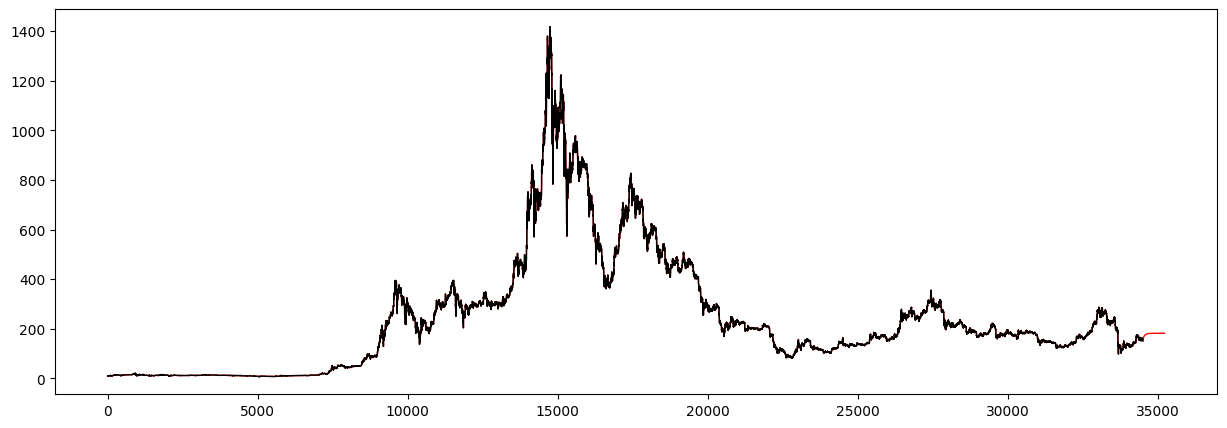

In [31]:
out = []
out = np.append(df.Close.values,new)
plt.figure(figsize=(15,5))
plt.plot(out,linewidth=1,color='red')
plt.plot(df.Close.values,linewidth=1,color='black')
plt.show()

In [32]:
len(out),len(df.Close)

(35217, 34497)

# Saving the model

In [33]:
import pickle


model.save('model.h5')
filename = 'scaler.pkl'
f = open(filename, 'wb')
pickle.dump(sc,f )
f.close()


c:\Users\riach\Projects\ethereum_price_prediction\ether\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
with open('window.npy', 'wb') as f:
    np.save(f, windows_sc)
with open('target.npy', 'wb') as f:
    np.save(f, target_sc)